<a href="https://colab.research.google.com/github/dinann1990/Zenius/blob/main/Final_Project_Kelompok_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import scipy as sp
import statistics as stats
from matplotlib.ticker import FuncFormatter
import requests
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# (1) SIPSN - Sumber Sampah

## Collecting Data

Sumber Data  : https://sipsn.menlhk.go.id/sipsn/public/data/sumber

In [ ]:
dp = pd.read_csv("https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/Data_Komposisi_Sumber_Sampah_SIPSN_KLHK.csv", skiprows=1)
dp

,Tahun,Provinsi,Kabupaten/Kota,Rumah Tangga(ton),Perkantoran(ton),Pasar(ton),Perniagaan(ton),Fasilitas Publik(ton),Kawasan(ton),Lain(ton)
0,2018,Papua Barat,Kab. Manokwari,121.90,NaN,19.80,4.40,4.12,NaN,NaN
1,2019,Maluku,Kota Ambon,56.16,10.80,43.20,30.24,25.92,7.05,8.64
2,2019,Sumatera Utara,Kab. Dairi,2.26,0.12,2.64,0.00,0.55,0.36,0.00
3,2019,Kalimantan Selatan,Kab. Tanah Laut,30.00,1.00,3.00,1.00,1.00,1.00,3.00
4,2019,D.I. Yogyakarta,Kab. Bantul,253.80,2.90,26.00,117.70,29.40,1.90,10.30
...,...,...,...,...,...,...,...,...,...,...
1033,2022,Kalimantan Selatan,Kota Banjarbaru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,2022,Sulawesi Selatan,Kab. Toraja Utara,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,2022,Sumatera Barat,Kota Payakumbuh,77.80,0.75,9.29,6.76,3.33,0.35,0.54
1036,2022,Kalimantan Barat,Kab. Mempawah,82.62,NaN,15.59,NaN,NaN,NaN,NaN


In [ ]:
#total_waste_per_year_province.to_csv('Geo Map Kabupaten Sampah.csv', index=False)

# Download the CSV file
#from google.colab import files
#files.download('Geo Map Kabupaten Sampah.csv')

In [ ]:
print("Before renaming:")
print(dp.head())
column_names = ['Tahun', 'Provinsi', 'Kabupaten/Kota', 'Rumah Tangga', 'Perkantoran', 'Pasar', 'Perniagaan', 'Fasilitas Publik','Kawasan', 'Lain' ][:len(dp.columns)]
dp.columns = column_names
print("\nAfter renaming:")
print(dp.head())

Before renaming:
   Tahun            Provinsi   Kabupaten/Kota  Rumah Tangga(ton)  \
0   2018         Papua Barat   Kab. Manokwari             121.90   
1   2019              Maluku       Kota Ambon              56.16   
2   2019      Sumatera Utara       Kab. Dairi               2.26   
3   2019  Kalimantan Selatan  Kab. Tanah Laut              30.00   
4   2019     D.I. Yogyakarta      Kab. Bantul             253.80   

   Perkantoran(ton)  Pasar(ton)  Perniagaan(ton)  Fasilitas Publik(ton)  \
0               NaN       19.80             4.40                   4.12   
1             10.80       43.20            30.24                  25.92   
2              0.12        2.64             0.00                   0.55   
3              1.00        3.00             1.00                   1.00   
4              2.90       26.00           117.70                  29.40   

   Kawasan(ton)  Lain(ton)  
0           NaN        NaN  
1          7.05       8.64  
2          0.36       0.00  
3      

In [ ]:
print("Before deletion:")
print(dp.head())
dp = dp.drop(dp.index[0])
dp = dp.reset_index(drop=True)
print("\nAfter deletion:")
print(dp.head())

Before deletion:
   Tahun            Provinsi   Kabupaten/Kota  Rumah Tangga  Perkantoran  \
0   2018         Papua Barat   Kab. Manokwari        121.90          NaN   
1   2019              Maluku       Kota Ambon         56.16        10.80   
2   2019      Sumatera Utara       Kab. Dairi          2.26         0.12   
3   2019  Kalimantan Selatan  Kab. Tanah Laut         30.00         1.00   
4   2019     D.I. Yogyakarta      Kab. Bantul        253.80         2.90   

   Pasar  Perniagaan  Fasilitas Publik  Kawasan   Lain  
0  19.80        4.40              4.12      NaN    NaN  
1  43.20       30.24             25.92     7.05   8.64  
2   2.64        0.00              0.55     0.36   0.00  
3   3.00        1.00              1.00     1.00   3.00  
4  26.00      117.70             29.40     1.90  10.30  

After deletion:
   Tahun            Provinsi   Kabupaten/Kota  Rumah Tangga  Perkantoran  \
0   2019              Maluku       Kota Ambon         56.16        10.80   
1   2019      S

## Data Visualization

### Rata-rata sumber sampah per tahun

In [ ]:
year_avg = dp.groupby('Tahun')['Rumah Tangga','Perkantoran','Perniagaan','Pasar','Fasilitas Publik','Kawasan','Lain'].mean()
year_avg = year_avg.reset_index()
year_avg

<ipython-input-12-20a3ad091f32>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_avg = dp.groupby('Tahun')['Rumah Tangga','Perkantoran','Perniagaan','Pasar','Fasilitas Publik','Kawasan','Lain'].mean()


,Tahun,Rumah Tangga,Perkantoran,Perniagaan,Pasar,Fasilitas Publik,Kawasan,Lain
0,2019,3339.267607,390.199814,765.119610,1551.327515,475.566000,685.310515,1213.751493
1,2020,2966.888931,244.165677,579.830405,1340.928385,388.140000,1256.941154,1082.167744
2,2021,1071.511667,225.965103,552.837754,404.299342,177.780071,126.079344,104.400763
3,2022,1129.920415,140.643619,425.847990,813.530467,159.089400,183.681294,93.983481


### Grafik Rata-rata sumber sampah per tahun

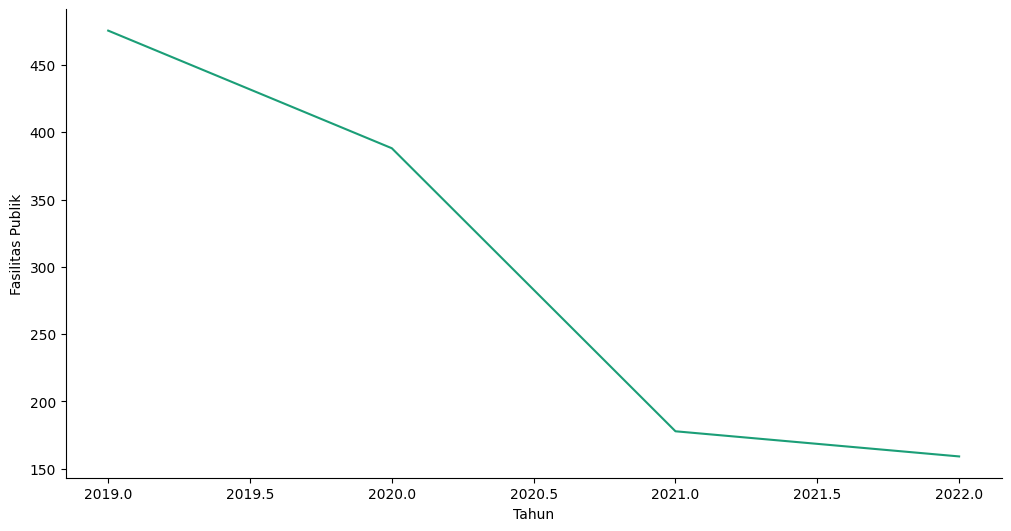

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Fasilitas Publik']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Fasilitas Publik')

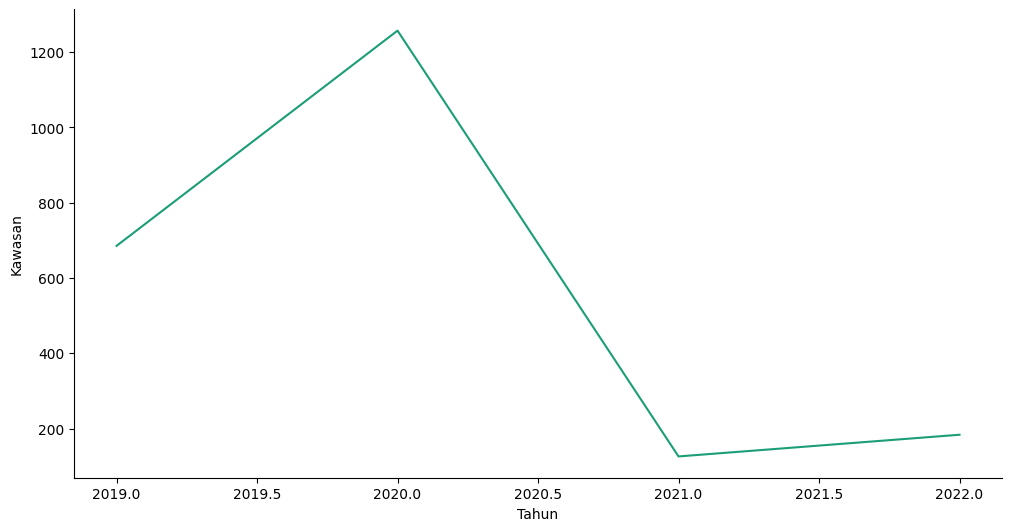

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Kawasan']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Kawasan')

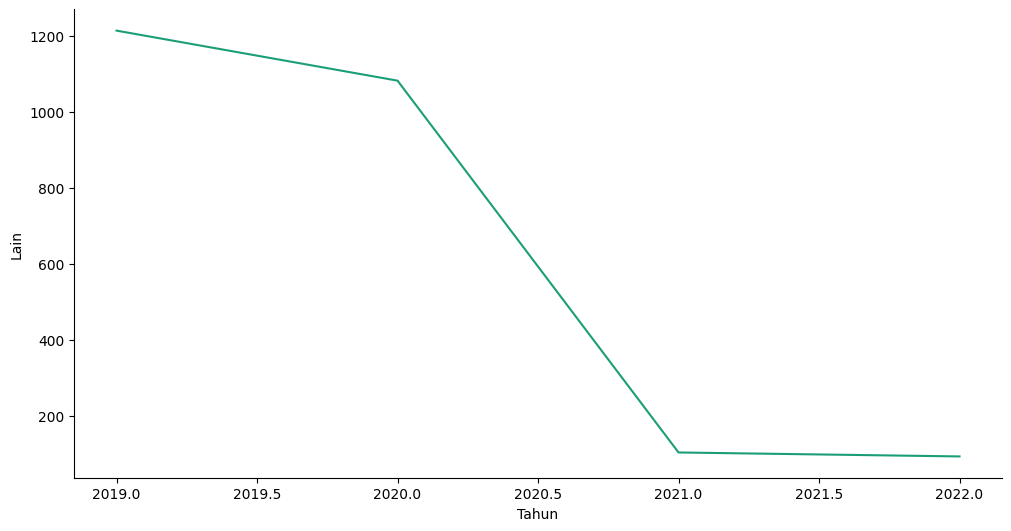

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Lain']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Lain')

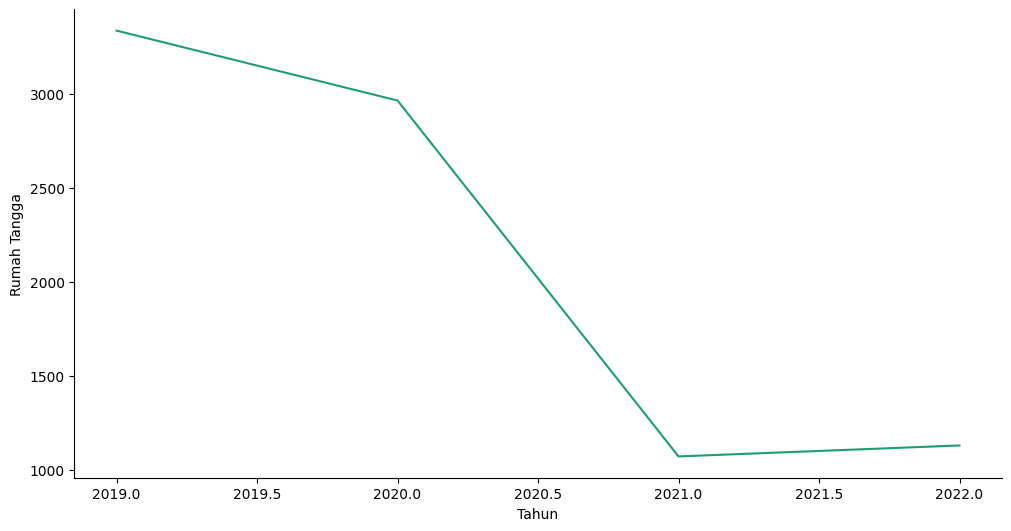

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Rumah Tangga']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Rumah Tangga')

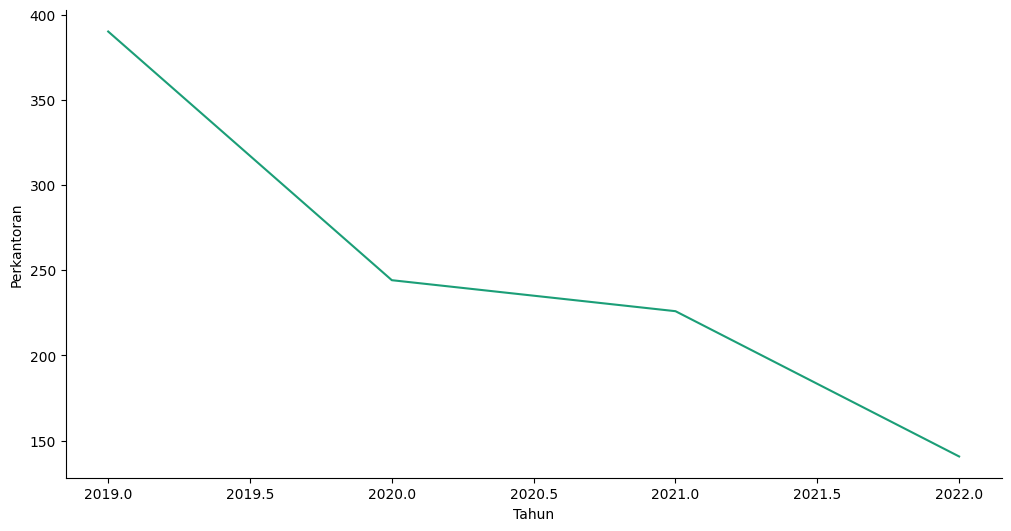

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Perkantoran']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Perkantoran')

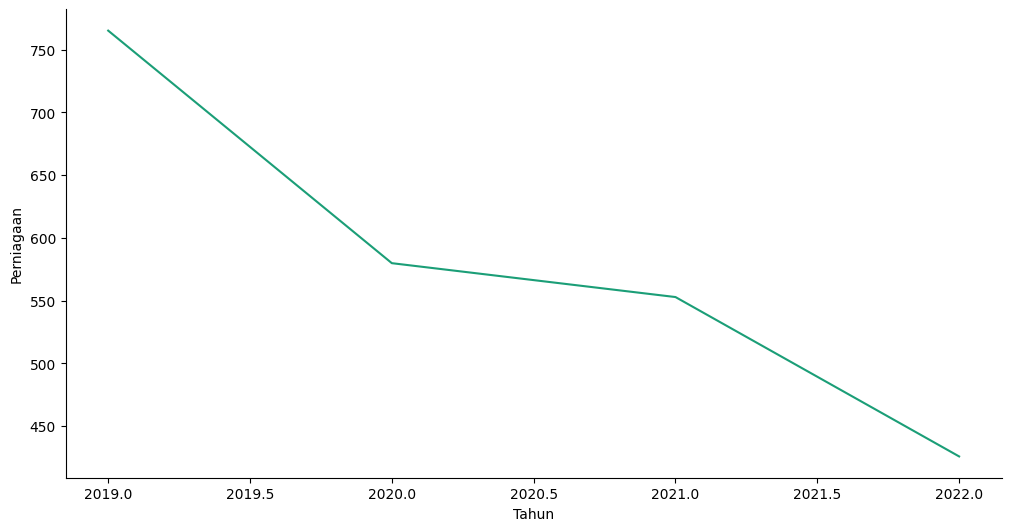

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Perniagaan']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Perniagaan')

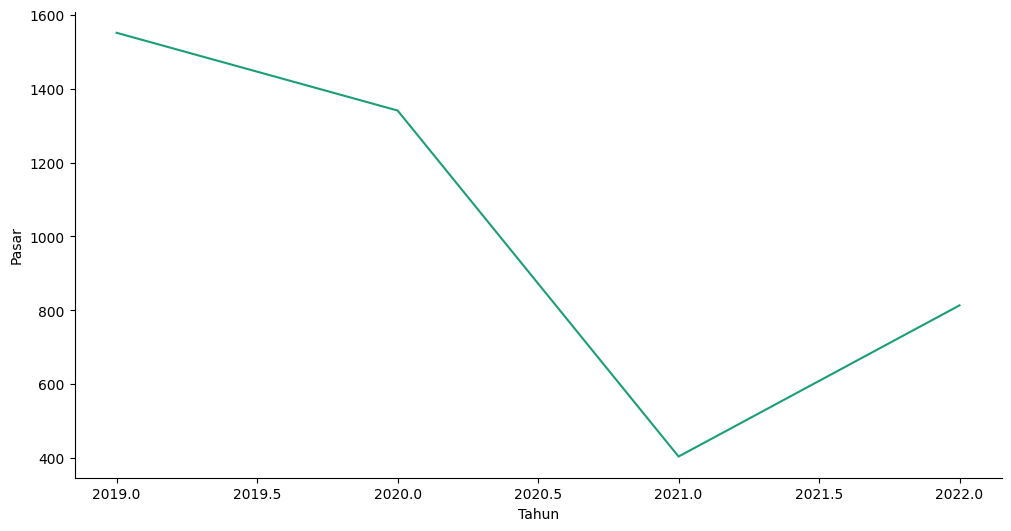

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Pasar']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year_avg.sort_values('Tahun', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Pasar')

### Menyatukan sumber-sumber sampah dalam satu kolom

In [ ]:
columns_of_interest = ["Tahun", "Provinsi", "Rumah Tangga", "Perkantoran", "Perniagaan", "Pasar", "Fasilitas Publik", "Kawasan", "Lain"]
new_dp = dp[columns_of_interest].copy()
new_dp["Sumber Sampah"] = new_dp[["Rumah Tangga", "Perkantoran", "Perniagaan", "Pasar", "Fasilitas Publik", "Kawasan", "Lain"]].sum(axis=1)
new_dp.drop(columns=["Rumah Tangga", "Perkantoran", "Perniagaan", "Pasar", "Fasilitas Publik", "Kawasan", "Lain"], inplace=True)
print(new_dp)

      Tahun            Provinsi  Sumber Sampah
0      2019              Maluku         182.01
1      2019      Sumatera Utara           5.93
2      2019  Kalimantan Selatan          40.00
3      2019     D.I. Yogyakarta         442.00
4      2019          Jawa Timur        1107.95
...     ...                 ...            ...
1032   2022  Kalimantan Selatan           0.00
1033   2022    Sulawesi Selatan           0.00
1034   2022      Sumatera Barat          98.82
1035   2022    Kalimantan Barat          98.21
1036   2022               Jambi          53.35

[1037 rows x 3 columns]


### Top 5 Provinsi dengan Sumber Sampah Terbanyak 2018-2022

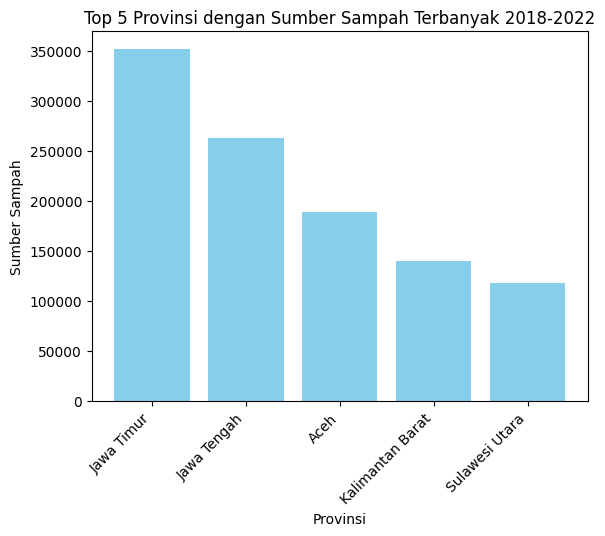

In [ ]:
kolom_sumber_sampah = 'Sumber Sampah'
top5_data = new_dp.nlargest(13, kolom_sumber_sampah)
plt.bar(top5_data['Provinsi'], top5_data[kolom_sumber_sampah], color='skyblue')
plt.xlabel('Provinsi')
plt.ylabel('Sumber Sampah')
plt.title('Top 5 Provinsi dengan Sumber Sampah Terbanyak 2018-2022')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 5 Provinsi dengan Sumber Sampah Terbanyak 2018-2022

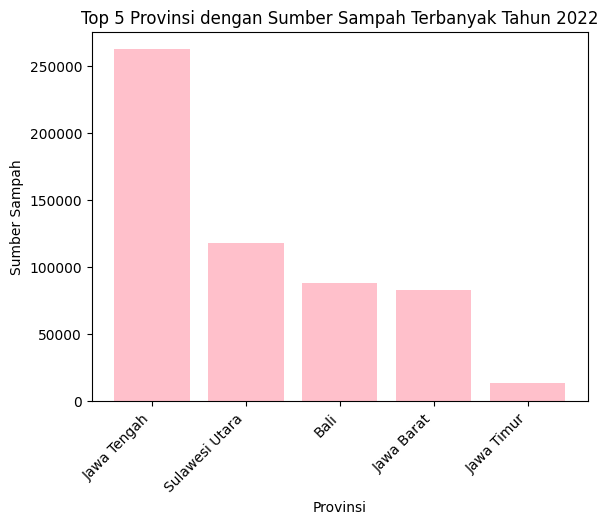

In [ ]:
kolom_sumber_sampah = 'Sumber Sampah'
data_2022 = new_dp[new_dp['Tahun'] == 2022]
top5_data = data_2022.nlargest(5, kolom_sumber_sampah)
plt.bar(top5_data['Provinsi'], top5_data[kolom_sumber_sampah], color='pink')
plt.xlabel('Provinsi')
plt.ylabel('Sumber Sampah')
plt.title('Top 5 Provinsi dengan Sumber Sampah Terbanyak Tahun 2022')
plt.xticks(rotation=45, ha='right')
plt.show()

### Jumlah Sumber Sampah per Provinsi

In [ ]:
result_dp = new_dp.groupby(['Provinsi', 'Sumber Sampah']).sum('Jumlah').reset_index()
print(result_dp)

           Provinsi  Sumber Sampah  Tahun
0              Aceh           0.00   6059
1              Aceh           1.77   2020
2              Aceh           1.85   2019
3              Aceh          19.50   4043
4              Aceh          20.02   2022
..              ...            ...    ...
631  Sumatera Utara         624.86   2020
632  Sumatera Utara         970.66   2022
633  Sumatera Utara        1097.00   2020
634  Sumatera Utara        1118.16   2021
635  Sumatera Utara        1767.00   2022

[636 rows x 3 columns]


In [ ]:
new_dp2 = result_dp.groupby(['Provinsi']).sum()
print(new_dp2)

                           Sumber Sampah   Tahun
Provinsi                                        
Aceh                           288928.22   80834
Bali                            92367.53   60616
Banten                           9958.28   42431
Bengkulu                          394.47   24242
D.I. Yogyakarta                  2322.91   32324
DKI Jakarta                      1612.36   44454
Gorontalo                        2109.90   20206
Jambi                            1042.89   46466
Jawa Barat                     100095.05  105072
Jawa Tengah                    914693.40  208129
Jawa Timur                    1191628.68  226295
Kalimantan Barat               281860.39   52531
Kalimantan Selatan               2501.43   88904
Kalimantan Tengah                7635.06   68696
Kalimantan Timur                 3321.72   62639
Kalimantan Utara                  212.52   16164
Kepulauan Bangka Belitung        1055.30   38389
Kepulauan Riau                   3270.68   48490
Lampung             

### Urutan dari terbesar sumber sampah per provinsi di Indonesia

In [ ]:
grouped_dp = result_dp.groupby(['Provinsi']).sum('Sumber Sampah').reset_index()
new_dp2 = grouped_dp.sort_values(by='Sumber Sampah', ascending=False)
print(new_dp2)

                     Provinsi  Sumber Sampah   Tahun
10                 Jawa Timur     1191628.68  226295
9                 Jawa Tengah      914693.40  208129
0                        Aceh      288928.22   80834
11           Kalimantan Barat      281860.39   52531
34             Sulawesi Utara      223074.35   88906
8                  Jawa Barat      100095.05  105072
1                        Bali       92367.53   60616
36           Sumatera Selatan       42673.71   68698
2                      Banten        9958.28   42431
37             Sumatera Utara        7976.31   82846
13          Kalimantan Tengah        7635.06   68696
31           Sulawesi Selatan        5910.53  135379
35             Sumatera Barat        5207.04  111136
18                    Lampung        3528.81   46475
14           Kalimantan Timur        3321.72   62639
17             Kepulauan Riau        3270.68   48490
12         Kalimantan Selatan        2501.43   88904
4             D.I. Yogyakarta        2322.91  

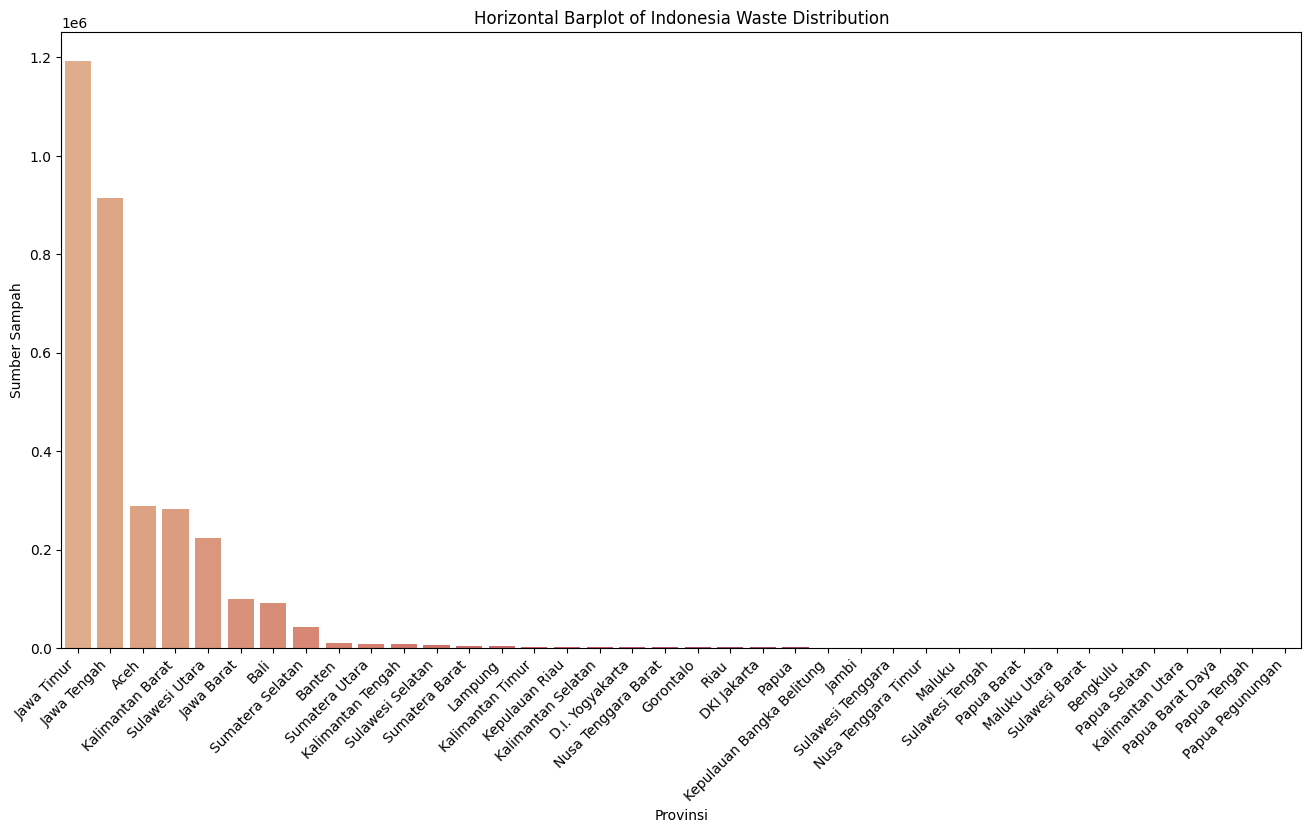

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Provinsi', y='Sumber Sampah', data=new_dp2, palette="flare")

plt.xlabel("Provinsi")
plt.ylabel("Sumber Sampah")
plt.title("Horizontal Barplot of Indonesia Waste Distribution")
plt.xticks(rotation=45, ha='right')

plt.show()

# (2) SIPSN - Komposisi Sampah

## Collecting Data

Sumber Data : https://sipsn.menlhk.go.id/sipsn/public/data/komposisi

In [ ]:
komposisi_sampah = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/Data_Komposisi_Jenis_Sampah_SIPSN_KLHK.csv', skiprows=1)
komposisi_sampah

,Tahun,Provinsi,Kabupaten/Kota,Sisa Makanan (%),Kayu-Ranting (%),Kertas-Karton (%),Plastik(%),Logam(%),Kain(%),Karet- Kulit (%),Kaca(%),Lainnya(%)
0,2022,Aceh,Kab. Aceh Selatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Aceh,Kab. Aceh Tenggara,41.00,11.00,2.00,18.00,2.00,5.00,17.00,4.00,NaN
2,2022,Aceh,Kab. Aceh Timur,37.00,14.00,5.00,26.00,5.00,3.00,2.00,4.00,4.00
3,2022,Aceh,Kab. Aceh Barat,41.80,13.30,10.70,18.20,3.10,2.60,1.80,2.00,6.50
4,2022,Aceh,Kab. Pidie,8.50,7.50,19.30,35.70,4.00,1.00,3.00,2.00,19.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2019,Papua,Kab. Biak Numfor,5.69,33.75,27.83,14.79,13.19,0.02,0.21,4.52,0.00
1034,2019,Papua,Kota Jayapura,66.39,10.58,4.79,6.60,4.34,2.05,1.08,0.46,3.71
1035,2019,Papua Selatan,Kab. Asmat,15.00,10.00,30.00,20.00,5.00,5.00,5.00,5.00,5.00
1036,2019,Papua Barat Daya,Kab. Raja Ampat,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN


## Cleansing

In [ ]:
komposisi_sampah = komposisi_sampah.rename(columns ={
    'Sisa Makanan (%)' : 'sisa_makanan',
    'Kayu-Ranting (%)' : 'kayu_ranting',
    'Kertas-Karton (%)' : 'kertas_karton',
    'Plastik(%)' : 'plastik',
    'Logam(%)' : 'logam',
    'Kain(%)' : 'kain',
    'Karet- Kulit (%)' : 'karet_kulit',
    'Kaca(%)' : 'kaca',
    'Lainnya(%)' : 'lainnya'
})
komposisi_sampah.head()

,Tahun,Provinsi,Kabupaten/Kota,sisa_makanan,kayu_ranting,kertas_karton,plastik,logam,kain,karet_kulit,kaca,lainnya
0,2022,Aceh,Kab. Aceh Selatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Aceh,Kab. Aceh Tenggara,41.0,11.0,2.0,18.0,2.0,5.0,17.0,4.0,NaN
2,2022,Aceh,Kab. Aceh Timur,37.0,14.0,5.0,26.0,5.0,3.0,2.0,4.0,4.0
3,2022,Aceh,Kab. Aceh Barat,41.8,13.3,10.7,18.2,3.1,2.6,1.8,2.0,6.5
4,2022,Aceh,Kab. Pidie,8.5,7.5,19.3,35.7,4.0,1.0,3.0,2.0,19.0


In [ ]:
komposisi_sampah['Tahun'].unique()

array([2022, 2021, 2020, 2019, 2018])

In [ ]:
#checking data types
komposisi_sampah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tahun           1038 non-null   int64  
 1   Provinsi        1038 non-null   object 
 2   Kabupaten/Kota  1038 non-null   object 
 3   sisa_makanan    794 non-null    float64
 4   kayu_ranting    766 non-null    float64
 5   kertas_karton   804 non-null    float64
 6   plastik         804 non-null    float64
 7   logam           778 non-null    float64
 8   kain            749 non-null    float64
 9   karet_kulit     706 non-null    float64
 10  kaca            752 non-null    float64
 11  lainnya         748 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 97.4+ KB


In [ ]:
# Handle missing values
komposisi_sampah.fillna(value = 0, inplace = True)

In [ ]:
komposisi_sampah.isnull().sum()

Tahun             0
Provinsi          0
Kabupaten/Kota    0
sisa_makanan      0
kayu_ranting      0
kertas_karton     0
plastik           0
logam             0
kain              0
karet_kulit       0
kaca              0
lainnya           0
dtype: int64

In [ ]:
komposisi_sampah.drop(['Kabupaten/Kota'], axis = 1, inplace = True)

In [ ]:
#count numerical and categorical data
num_cols = komposisi_sampah._get_numeric_data().columns
cat_cols = list(set(komposisi_sampah.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['Tahun', 'sisa_makanan', 'kayu_ranting', 'kertas_karton', 'plastik',
       'logam', 'kain', 'karet_kulit', 'kaca', 'lainnya'],
      dtype='object')
Categorical columns:  ['Provinsi']


## Deskriptif Statistik

In [ ]:
# statistik deskriptif
summary_stats = komposisi_sampah.describe()
summary_stats

,Tahun,sisa_makanan,kayu_ranting,kertas_karton,plastik,logam,kain,karet_kulit,kaca,lainnya
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,2020.591522,30.980954,10.487620,9.102457,13.622476,2.401118,1.864027,1.328671,1.641802,5.129576
std,1.146377,24.112801,14.032935,7.836541,10.743793,3.802093,2.345745,1.966938,2.109790,9.519840
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,1.160000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,34.000000,6.000000,9.000000,14.000000,1.000000,1.000000,0.570000,1.000000,2.000000
75%,2022.000000,51.267500,14.337500,13.120000,20.000000,3.000000,3.000000,2.000000,2.067500,6.800000
max,2022.000000,83.000000,86.000000,40.300000,63.000000,45.000000,19.000000,17.000000,17.380000,100.000000


## Data Visualization Barplot

In [ ]:
#mean per year to variable based on data
year_avg = komposisi_sampah.groupby('Tahun')['sisa_makanan','kayu_ranting','kertas_karton','plastik','logam','kain','karet_kulit','kaca','lainnya'].mean()
year_avg = year_avg.reset_index()
year_avg

<ipython-input-36-daa44fa49cfb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_avg = komposisi_sampah.groupby('Tahun')['sisa_makanan','kayu_ranting','kertas_karton','plastik','logam','kain','karet_kulit','kaca','lainnya'].mean()


,Tahun,sisa_makanan,kayu_ranting,kertas_karton,plastik,logam,kain,karet_kulit,kaca,lainnya
0,2018,44.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,0.000000,19.000000
1,2019,31.646074,12.490124,9.144504,12.622149,2.514091,1.719380,1.211818,1.533471,4.530455
2,2020,30.111048,10.090242,9.189153,13.274879,2.284315,1.833871,1.261935,1.599798,4.793952
3,2021,29.993178,9.779068,9.131780,13.861017,2.496483,1.974364,1.286144,1.800508,5.679492
4,2022,31.864791,9.817685,8.972251,14.457235,2.341704,1.922894,1.509357,1.644437,5.401511


In [ ]:
#mean per province to variable based on data
provinsi_avg = komposisi_sampah.groupby('Provinsi')['sisa_makanan','kayu_ranting','kertas_karton','plastik','logam','kain','karet_kulit','kaca','lainnya'].mean()
provinsi_avg = provinsi_avg.reset_index()
provinsi_avg

<ipython-input-37-79a858a124e8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  provinsi_avg = komposisi_sampah.groupby('Provinsi')['sisa_makanan','kayu_ranting','kertas_karton','plastik','logam','kain','karet_kulit','kaca','lainnya'].mean()


,Provinsi,sisa_makanan,kayu_ranting,kertas_karton,plastik,logam,kain,karet_kulit,kaca,lainnya
0,Aceh,23.608500,13.129500,8.632500,16.601250,5.123000,4.393000,4.079500,3.014500,6.143250
1,Bali,16.112333,40.360333,8.039667,14.682333,1.851667,1.768667,1.862333,1.152667,5.770000
2,Banten,32.815714,9.768095,8.633333,14.171905,1.789524,1.358095,0.996190,2.362381,3.927143
3,Bengkulu,25.570833,20.047500,7.405000,7.138333,2.408333,0.582500,0.800000,0.997500,1.716667
4,D.I. Yogyakarta,36.908750,2.436250,6.175000,10.176875,1.805625,0.365625,0.095625,2.556875,1.841875
5,DKI Jakarta,6.423182,1.968636,0.709545,1.088636,0.132727,0.169545,0.076818,0.151818,7.460909
6,Gorontalo,37.268000,15.124000,14.201000,21.799000,2.720000,1.600000,1.700000,2.810000,2.778000
7,Jambi,23.312174,6.746522,8.134783,11.012609,3.483043,1.804348,2.602609,0.679130,7.442174
8,Jawa Barat,31.970577,7.922115,9.131923,13.252115,1.839038,2.317308,0.700385,2.539808,7.187308
9,Jawa Tengah,34.068350,11.919515,9.615437,15.343010,2.226311,2.144951,1.212233,1.909709,4.694854


In [ ]:
total_jenisampah = provinsi_avg.drop(['Provinsi'], axis = 1)
total_jenisampah

,sisa_makanan,kayu_ranting,kertas_karton,plastik,logam,kain,karet_kulit,kaca,lainnya
0,23.608500,13.129500,8.632500,16.601250,5.123000,4.393000,4.079500,3.014500,6.143250
1,16.112333,40.360333,8.039667,14.682333,1.851667,1.768667,1.862333,1.152667,5.770000
2,32.815714,9.768095,8.633333,14.171905,1.789524,1.358095,0.996190,2.362381,3.927143
3,25.570833,20.047500,7.405000,7.138333,2.408333,0.582500,0.800000,0.997500,1.716667
4,36.908750,2.436250,6.175000,10.176875,1.805625,0.365625,0.095625,2.556875,1.841875
5,6.423182,1.968636,0.709545,1.088636,0.132727,0.169545,0.076818,0.151818,7.460909
6,37.268000,15.124000,14.201000,21.799000,2.720000,1.600000,1.700000,2.810000,2.778000
7,23.312174,6.746522,8.134783,11.012609,3.483043,1.804348,2.602609,0.679130,7.442174
8,31.970577,7.922115,9.131923,13.252115,1.839038,2.317308,0.700385,2.539808,7.187308
9,34.068350,11.919515,9.615437,15.343010,2.226311,2.144951,1.212233,1.909709,4.694854


In [ ]:
#proportion of province based on data
proporsi = komposisi_sampah.Provinsi.value_counts(normalize=True).to_frame().reset_index()

#rename tabel
proporsi = proporsi.rename(columns={"index":"Provinsi","Provinsi":"Percent"})

In [ ]:
proporsi

,Provinsi,Percent
0,Jawa Timur,0.107900
1,Jawa Tengah,0.099229
2,Sulawesi Selatan,0.064547
3,Sumatera Barat,0.052987
4,Jawa Barat,0.050096
5,Sulawesi Utara,0.042389
6,Kalimantan Selatan,0.042389
7,Sumatera Utara,0.039499
8,Aceh,0.038536
9,Sumatera Selatan,0.032755


### Distribusi Barplot Proporsi

In [ ]:
total_per_kolom = total_jenisampah.sum()
total_per_kolom

sisa_makanan     1042.006702
kayu_ranting      379.921919
kertas_karton     329.440335
plastik           495.507443
logam              87.097393
kain               62.698188
karet_kulit        47.005711
kaca               60.857298
lainnya           176.187285
dtype: float64

In [ ]:
# create dataframe memuat statistik deskriptif dari dataset part 1
df_total = pd.DataFrame({'Komposisi Sampah' : ['Sisa Makanan', 'Kayu Ranting', 'Kertas Karton', 'Plastik', 'Logam', 'Kain','Karet Kulit','Kaca', 'Lainnya'],
                          'Total' : [1416.660516, 525.540322, 433.271550, 636.414687, 126.859328, 90.725644, 75.723421, 87.346418,279.083724]})
df_total

,Komposisi Sampah,Total
0,Sisa Makanan,1416.660516
1,Kayu Ranting,525.540322
2,Kertas Karton,433.271550
3,Plastik,636.414687
4,Logam,126.859328
5,Kain,90.725644
6,Karet Kulit,75.723421
7,Kaca,87.346418
8,Lainnya,279.083724


In [ ]:
# create barplot proporsi provinsi
bar_total = px.bar(df_total, x=df_total['Komposisi Sampah'], y='Total', color=df_total['Komposisi Sampah'], title='Barplot Total Komposisi Sampah')
bar_total

In [ ]:
# create barplot proporsi provinsi
bar_pro = px.bar(proporsi, x='Provinsi', y='Percent', color='Provinsi', title='Barplot Proporsi')
bar_pro

### Sebaran Sisa Makanan

In [ ]:
# create barplot of sisa makanan
bar_sisa = px.bar(provinsi_avg, x='Provinsi', y='sisa_makanan', color='Provinsi', title='Distribution of Sisa Makanan')
bar_sisa

### Sebaran Kertas Karton

In [ ]:
# create barplot kayu ranting
bar_karton = px.bar(provinsi_avg, x='Provinsi', y='kertas_karton', color='Provinsi', title='Distribution of Kertas Karton')
bar_karton

### Sebaran Kayu Ranting

In [ ]:
# create barplot kayu ranting
bar_kayu = px.bar(provinsi_avg, x='Provinsi', y='kayu_ranting', color='Provinsi', title='Distribution of Kayu Ranting')
bar_kayu

### Sebaran Plastik

In [ ]:
# create barplot plastik
bar_plastik = px.bar(provinsi_avg, x='Provinsi', y='plastik', color='Provinsi', title='Distribution of Plastik')
bar_plastik

### Sebaran Logam

In [ ]:
# create barplot logam
bar_logam = px.bar(provinsi_avg, x='Provinsi', y='logam', color='Provinsi', title='Distribution of Logam')
bar_logam

### Sebaran Kain

In [ ]:
# create barplot kain
bar_kain = px.bar(provinsi_avg, x='Provinsi', y='kain', color='Provinsi', title='Distribution of Kain')
bar_kain

### Sebaran Karet Kulit

In [ ]:
# create barplot karet kulit
bar_karet = px.bar(provinsi_avg, x='Provinsi', y='karet_kulit', color='Provinsi', title='Distribution of Karet Kulit')
bar_karet

### Sebaran Kaca

In [ ]:
# create barplot kaca
bar_kaca = px.bar(provinsi_avg, x='Provinsi', y='kaca', color='Provinsi', title='Distribution of Kaca')
bar_kaca

In [ ]:
# create barplot lainnya
bar_lain = px.bar(provinsi_avg, x='Provinsi', y='lainnya', color='Provinsi', title='Distribution of Lainnya')
bar_lain

## Data Visualization Lineplot

### Line Plot Sisa Makanan

Text(0, 0.5, 'Sisa Makanan')

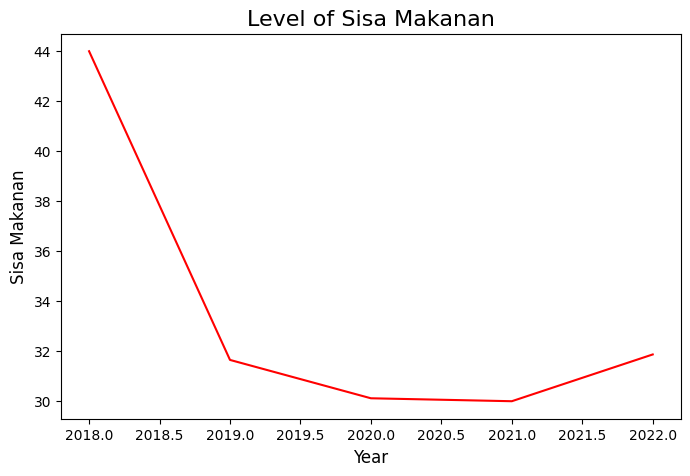

In [ ]:
# create line plot of sisa makanan average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['sisa_makanan']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Sisa Makanan', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sisa Makanan', fontsize = 12)

### Line Plot Kayu Ranting

Text(0, 0.5, 'Kayu Ranting')

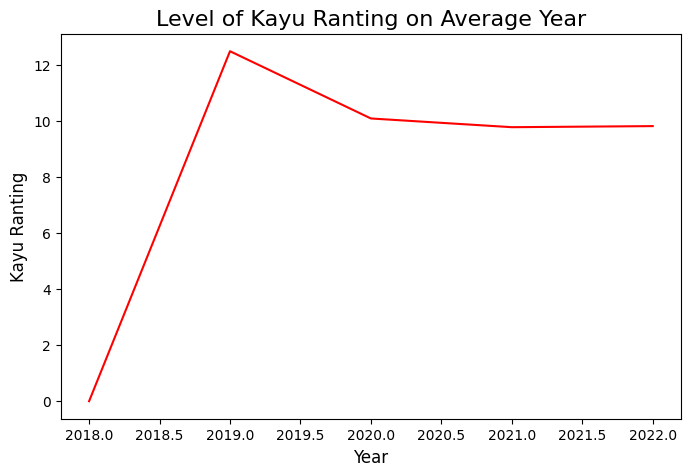

In [ ]:
# create line plot of kayu ranting average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['kayu_ranting']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Kayu Ranting on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Kayu Ranting', fontsize = 12)

### Line Plot Kertas Karton

Text(0, 0.5, 'Kertas Karton')

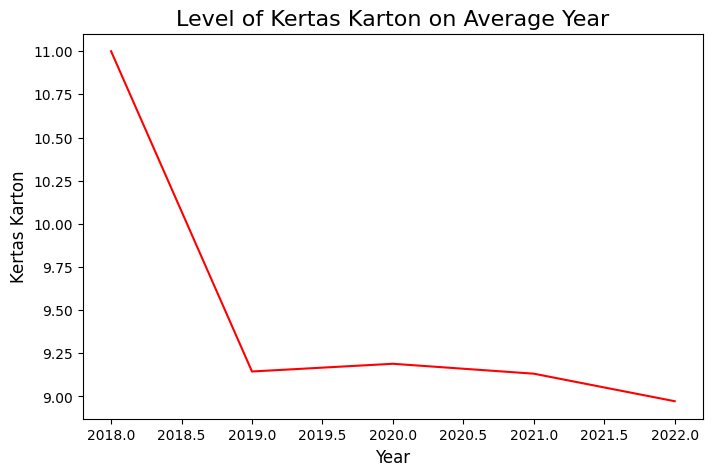

In [ ]:
# create line plot of Kertas Karton average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['kertas_karton']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Kertas Karton on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Kertas Karton', fontsize = 12)

### Line Plot Plastik

Text(0, 0.5, 'Plastik')

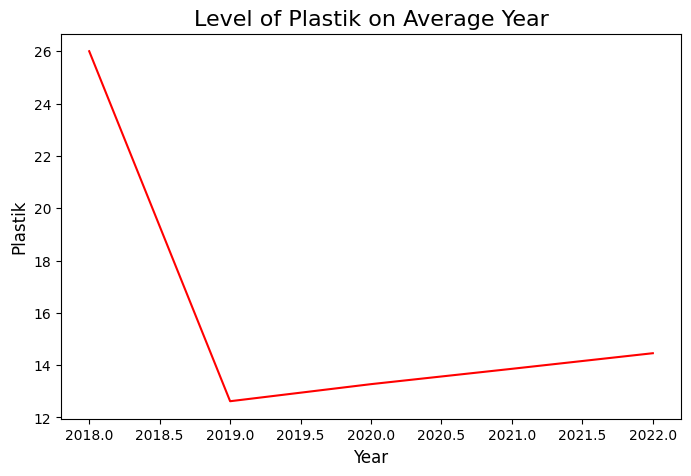

In [ ]:
# create line plot of Plastik average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['plastik']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Plastik on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Plastik', fontsize = 12)

### Line Plot Logam

Text(0, 0.5, 'Logam')

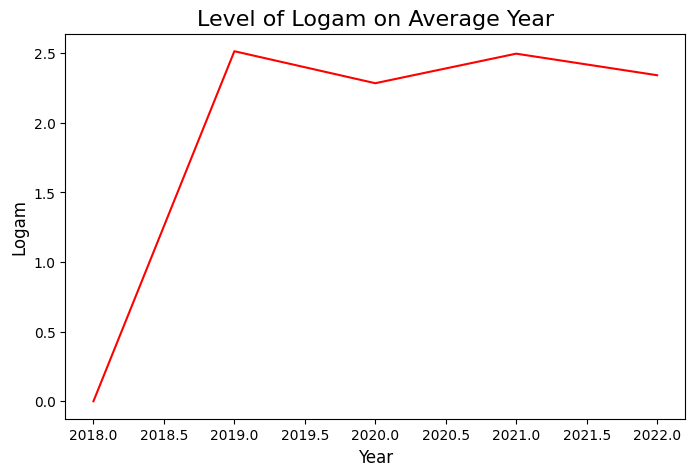

In [ ]:
# create line plot of Logam average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['logam']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Logam on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Logam', fontsize = 12)

### Line Plot Kain

Text(0, 0.5, 'Kain')

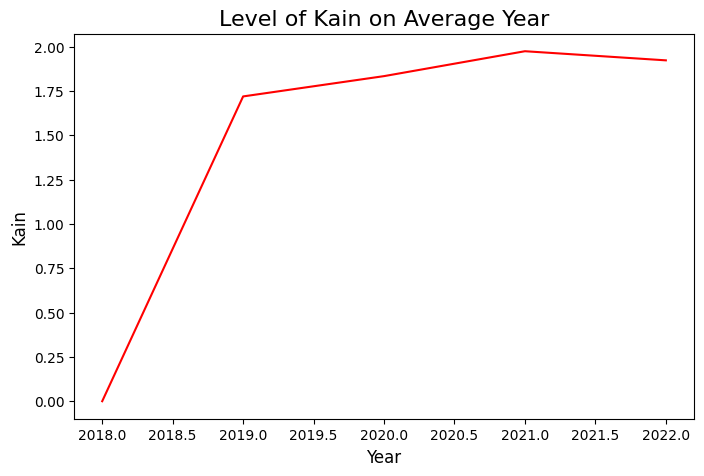

In [ ]:
# create line plot of Kain average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['kain']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Kain on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Kain', fontsize = 12)

### Line Plot Karet Kulit

Text(0, 0.5, 'Karet Kulit')

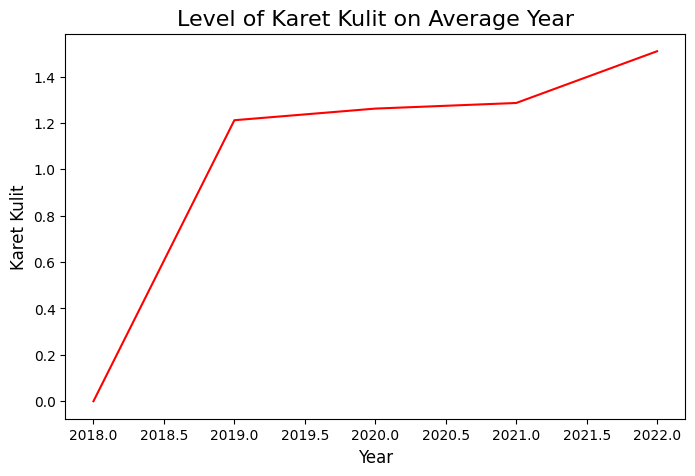

In [ ]:
# create line plot of Karet Kulit average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['karet_kulit']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Karet Kulit on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Karet Kulit', fontsize = 12)

### Line Plot Kaca

Text(0, 0.5, 'Kaca')

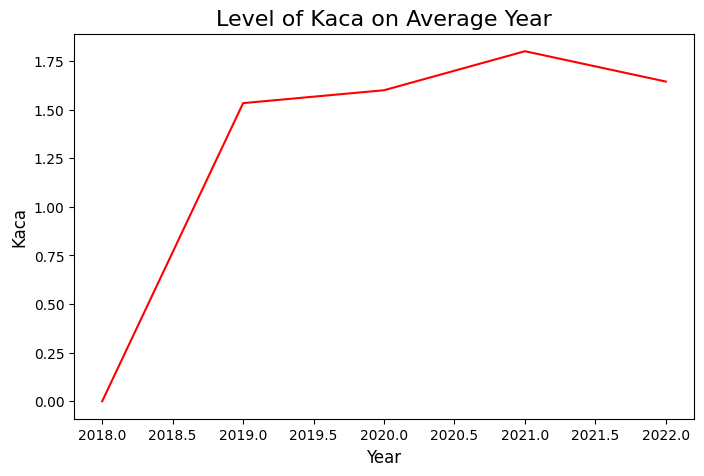

In [ ]:
# create line plot of Kaca average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['kaca']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Kaca on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Kaca', fontsize = 12)

### Line Plot Lainnya

Text(0, 0.5, 'Lainnya')

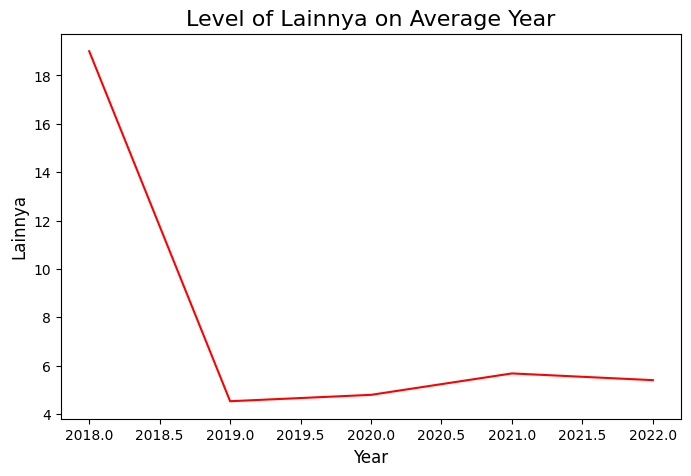

In [ ]:
# create line plot of Lainnya average year based on year
month_all = year_avg['Tahun']
level_all = year_avg['lainnya']

#add label
plt.figure(figsize = (8,5))
plt.plot(month_all,level_all, color = 'red')
plt.title('Level of Lainnya on Average Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Lainnya', fontsize = 12)

# (3.1) Greenhouse gas emissions by sector (Waste)

## Data Collecting

Sumber Data : https://ourworldindata.org/emissions-by-sector

In [ ]:
ghg_emisi = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/ghg-emissions-by-sector.csv')
ghg_emisi

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,10490000.0,87400000.0,2480000.0,2650000.00,1600000.0,1080000.0,2220000.0,5930000.0,680000.0,800000.0,129999.99
6351,Zimbabwe,ZWE,2017,10760000.0,87290000.0,2540000.0,2690000.00,1680000.0,1100000.0,2280000.0,5160000.0,700000.0,800000.0,160000.00
6352,Zimbabwe,ZWE,2018,10940000.0,87380000.0,2590000.0,2740000.00,1830000.0,1160000.0,2930000.0,5530000.0,710000.0,940000.0,190000.00
6353,Zimbabwe,ZWE,2019,10990000.0,87330000.0,2640000.0,2770000.00,1810000.0,1100000.0,2600000.0,5130000.0,730000.0,930000.0,160000.00


## Cleaning

In [ ]:
ghg_emisi = ghg_emisi.rename(columns ={
    'Greenhouse gas emissions from agriculture' : 'Agriculture',
    'Greenhouse gas emissions from land use change and forestry' : 'land use change and forestry',
    'Greenhouse gas emissions from waste' : 'waste',
    'Greenhouse gas emissions from buildings' : 'buildings',
    'Greenhouse gas emissions from industry' : 'industry',
    'Greenhouse gas emissions from manufacturing and construction' : 'manufacturing and construction',
    'Greenhouse gas emissions from transport' : 'transport',
    'Greenhouse gas emissions from electricity and heat' : 'electricity and heat',
    'Fugitive emissions of greenhouse gases from energy production' : 'energy production',
    'Greenhouse gas emissions from other fuel combustion' : 'fuel combustion',
    'Greenhouse gas emissions from bunker fuels' : 'bunker fuels'
})
ghg_emisi.head()

,Entity,Code,Year,Agriculture,land use change and forestry,waste,buildings,industry,manufacturing and construction,transport,electricity and heat,energy production,fuel combustion,bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,980000.0,320000.0,280000.0,0.0,20000.0
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.0
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.0
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.0
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.0


In [ ]:
# Pilih kolom yang akan dijumlahkan (semua kecuali "Entity", "Code", dan "Year")
columns_to_sum = ghg_emisi.columns[3:]

# Gunakan groupby untuk menjumlahkan nilai per tahun
sum_per_year = ghg_emisi.groupby('Year')[columns_to_sum].sum().reset_index()

## Visualization

In [ ]:
from matplotlib.ticker import FuncFormatter

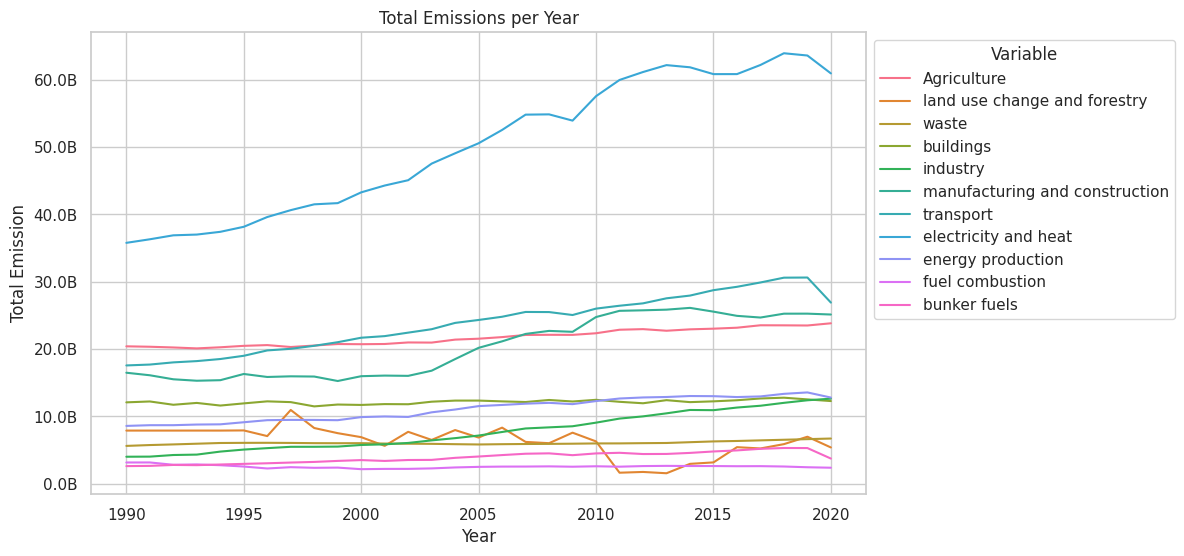

In [ ]:
# Plot line chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(sum_per_year, id_vars=['Year']))
plt.title('Total Emissions per Year')

# Menggunakan formatter untuk mengubah satuan menjadi billion
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

# Terapkan formatter pada sumbu Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))


plt.xlabel('Year')
plt.ylabel('Total Emission')
plt.legend(title='Variable', bbox_to_anchor=(1, 1))
plt.show()

variabel “waste” menunjukkan tren yang relatif stabil selama bertahun-tahun. Dimulai dari titik rendah pada tahun 1990, naik sedikit hingga sekitar tahun 2005, dan kemudian tetap cukup konstan, dengan fluktuasi minor, hingga tahun 2020. Variabel “waste” adalah salah satu kontributor terendah untuk emisi total per tahun dibandingkan dengan variabel lain seperti “produksi energi” dan “listrik dan panas”.



# (3.2) Indonesia Methane Emissions by Sector

## Data Collecting

Sumber Data : https://ourworldindata.org/grapher/methane-emissions-by-sector?tab=table&time=latest&country=~IDN  

In [ ]:
Methane = pd.read_csv("https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/methane-emissions-by-sector.csv")
Methane

,Entity,Code,Year,Methane emissions from agriculture,Fugitive emissions of methane from energy production,Methane emissions from waste,Methane emissions from land use change and forestry,Methane emissions from other fuel combustion,Methane emissions from industry
0,Afghanistan,AFG,1990,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,AFG,1991,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,AFG,1992,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,AFG,1993,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,AFG,1994,5930000.0,120000.0,1410000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,ZWE,2016,6140000.0,680000.0,2320000.0,110000.0,120000.0,480000.0
6351,Zimbabwe,ZWE,2017,6230000.0,700000.0,2370000.0,60000.0,120000.0,480000.0
6352,Zimbabwe,ZWE,2018,6380000.0,710000.0,2420000.0,110000.0,120000.0,480000.0
6353,Zimbabwe,ZWE,2019,6440000.0,730000.0,2470000.0,80000.0,120000.0,480000.0


In [ ]:
Methane = Methane.rename(columns ={
    'Methane emissions from agriculture' : 'Agriculture',
    'Fugitive emissions of methane from energy production' : 'energy production',
    'Methane emissions from waste' : 'waste',
    'Methane emissions from land use change and forestry' : 'land use change and forestry',
    'Methane emissions from other fuel combustion' : 'other fuel combustion',
    'Methane emissions from industry' : 'industry'
})
Methane.head()

,Entity,Code,Year,Agriculture,energy production,waste,land use change and forestry,other fuel combustion,industry
0,Afghanistan,AFG,1990,5360000.0,280000.0,1090000.0,0.0,0.0,0.0
1,Afghanistan,AFG,1991,5600000.0,240000.0,1170000.0,0.0,0.0,0.0
2,Afghanistan,AFG,1992,5670000.0,200000.0,1250000.0,0.0,0.0,0.0
3,Afghanistan,AFG,1993,5710000.0,160000.0,1330000.0,0.0,0.0,0.0
4,Afghanistan,AFG,1994,5930000.0,120000.0,1410000.0,0.0,0.0,0.0


## Visualization

### Emisi Metana di Indonesia

In [ ]:
filtered_df = Methane[Methane['Entity'] == 'Indonesia']

In [ ]:
filtered_df

,Entity,Code,Year,Agriculture,energy production,waste,land use change and forestry,other fuel combustion,industry
2604,Indonesia,IDN,1990,78080000.0,33990000.0,156600000.0,60430000.0,10000.0,0.0
2605,Indonesia,IDN,1991,77350000.0,38200000.0,159870000.0,60430000.0,10000.0,0.0
2606,Indonesia,IDN,1992,82690000.0,39240000.0,163140000.0,60430000.0,10000.0,0.0
2607,Indonesia,IDN,1993,81340000.0,40750000.0,166410000.0,60430000.0,20000.0,0.0
2608,Indonesia,IDN,1994,80920000.0,43550000.0,169700000.0,60430000.0,20000.0,0.0
2609,Indonesia,IDN,1995,84910000.0,44870000.0,172780000.0,60430000.0,20000.0,0.0
2610,Indonesia,IDN,1996,85980000.0,47190000.0,176390000.0,17730000.0,20000.0,0.0
2611,Indonesia,IDN,1997,83970000.0,48620000.0,180000000.0,262120000.0,20000.0,0.0
2612,Indonesia,IDN,1998,85890000.0,48180000.0,183610000.0,71310000.0,20000.0,0.0
2613,Indonesia,IDN,1999,85860000.0,49930000.0,187220000.0,27040000.0,30000.0,0.0


In [ ]:
totals = filtered_df[['Agriculture', 'energy production', 'waste', 'land use change and forestry', 'other fuel combustion', 'industry']].sum()

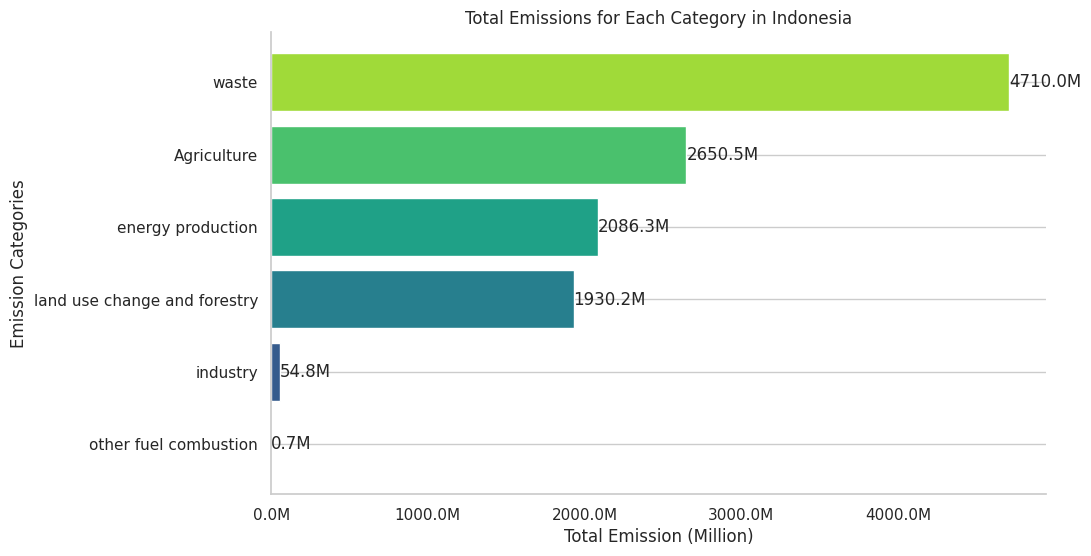

In [ ]:
totals = totals.sort_values(ascending=True)
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', n_colors=len(totals))

bars = plt.barh(totals.index, totals.values, color=colors)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width() / 1e6:.1f}M', va='center')

plt.xlabel('Total Emission (Million)')
plt.ylabel('Emission Categories')
plt.title('Total Emissions for Each Category in Indonesia')
plt.grid(axis='x')

# Menambahkan formatter ke sumbu x
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Menampilkan grid Seaborn (tidak perlu, tetapi jika Anda suka)
sns.despine()

plt.show()

Grafik ini menunjukkan total emisi untuk setiap kategori di Indonesia. Variabel utama dalam grafik ini adalah limbah (waste), yang memiliki total emisi tertinggi sebesar 4710.0 juta.

Ini menunjukkan bahwa limbah berkontribusi paling banyak terhadap total emisi di Indonesia, jauh melampaui kategori lain seperti pertanian, produksi energi, perubahan penggunaan lahan dan kehutanan, industri, dan pembakaran bahan bakar lainnya.

Grafik ini menunjukkan pentingnya pengelolaan limbah yang efektif dan berkelanjutan di Indonesia untuk mengurangi dampak lingkungan dan meminimalkan emisi gas rumah kaca

In [ ]:
totals

other fuel combustion           7.400000e+05
industry                        5.481000e+07
land use change and forestry    1.930190e+09
energy production               2.086270e+09
Agriculture                     2.650540e+09
waste                           4.709980e+09
dtype: float64

### Rata-rata emisi karbon per tahun

In [ ]:
Year_avg = Methane.groupby('Year')['Agriculture','energy production','waste','land use change and forestry','other fuel combustion','industry'].mean()
Year_avg = Year_avg.reset_index()
Year_avg

<ipython-input-76-097dd72d0f25>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Agriculture,energy production,waste,land use change and forestry,other fuel combustion,industry
0,1990,6.401530e+07,3.775171e+07,2.587410e+07,3.306683e+06,272704.076531,111477.832315
1,1991,6.302898e+07,3.792834e+07,2.649634e+07,3.258293e+06,272944.165482,104729.062660
2,1992,6.266741e+07,3.711307e+07,2.696585e+07,3.258293e+06,250303.029798,103596.058867
3,1993,6.231000e+07,3.744839e+07,2.748185e+07,3.258293e+06,209494.949141,100295.565616
4,1994,6.275132e+07,3.745781e+07,2.789556e+07,3.258293e+06,205404.040909,114039.408867
5,1995,6.305283e+07,3.871132e+07,2.793746e+07,3.258293e+06,195175.878945,113103.448424
6,1996,6.296761e+07,3.984307e+07,2.790044e+07,2.750829e+06,158140.706231,113793.102365
7,1997,6.208751e+07,4.010634e+07,2.774449e+07,7.894683e+06,184422.110201,121330.047882
8,1998,6.249766e+07,4.025864e+07,2.749966e+07,5.333854e+06,176834.173216,122216.748719
9,1999,6.310137e+07,4.021707e+07,2.738088e+07,3.839219e+06,176331.660854,129556.650197


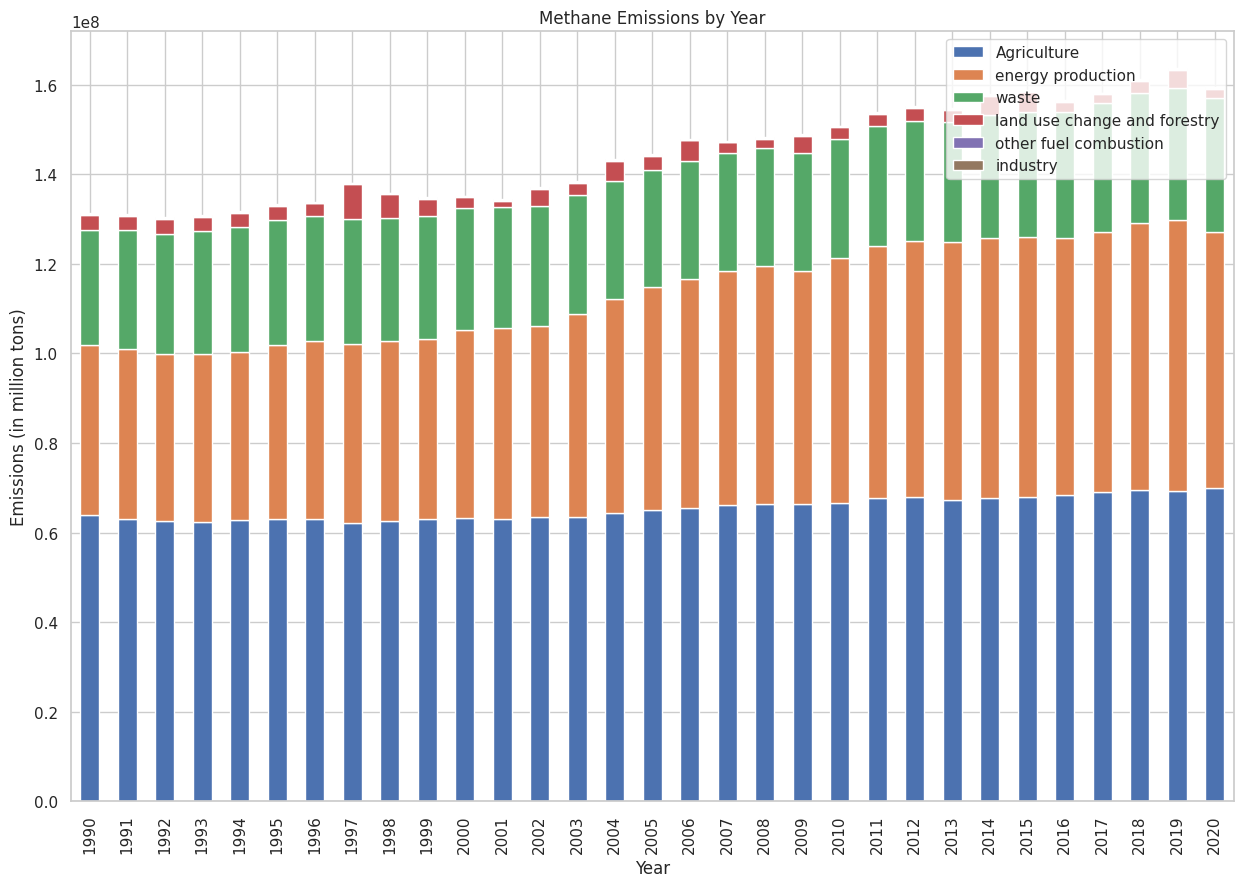

In [ ]:
Year_avg.plot(x='Year', kind='bar', stacked=True, figsize=(15, 10))
plt.title('Methane Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emissions (in million tons)')
plt.legend(loc='upper right')
plt.show()

### Top 5 emisi metana terbanyak

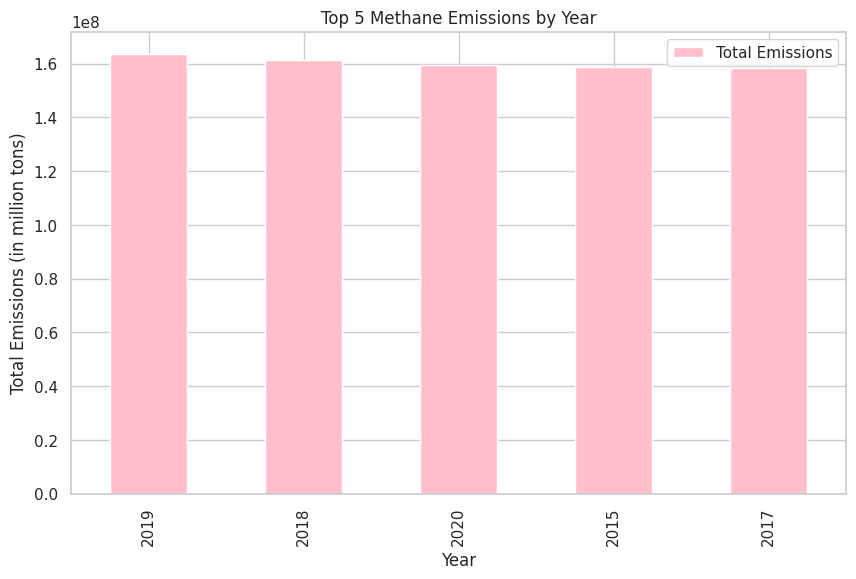

In [ ]:
Year_avg['Total Emissions'] = Year_avg.sum(axis=1)
Year_avg_sorted = Year_avg.sort_values(by='Total Emissions', ascending=False)
top5 = Year_avg_sorted.head(5)
top5.plot(x='Year', y='Total Emissions', kind='bar', stacked=True, figsize=(10, 6), color='Pink')
plt.title('Top 5 Methane Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (in million tons)')
plt.legend(loc='upper right')
plt.show()

### Top penghasil emisi karbon terbanyak di 2020

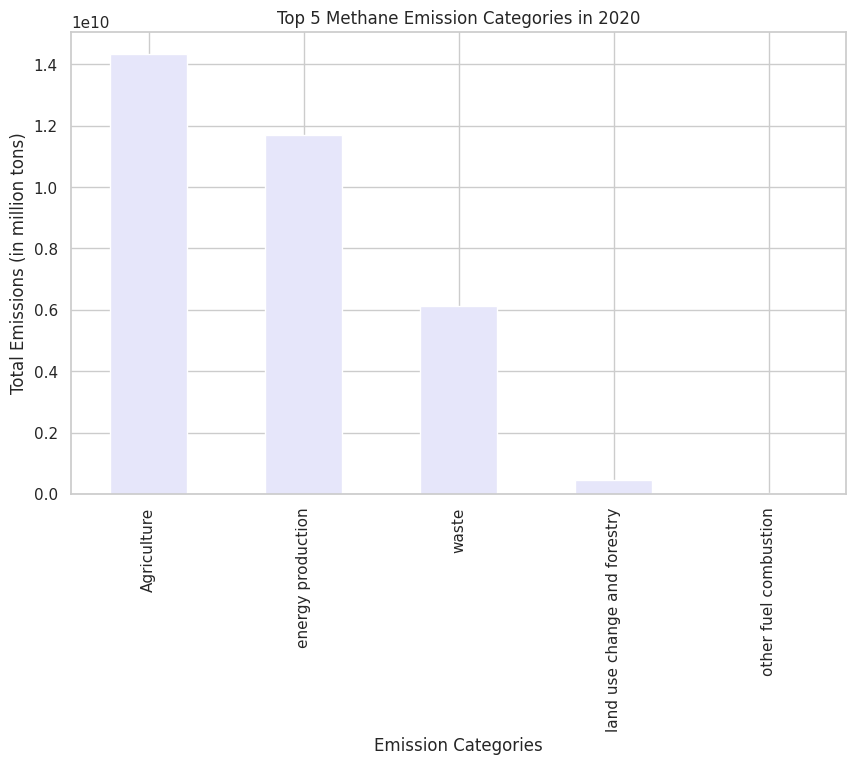

In [ ]:
top_emission_columns = Methane[['Year', 'Agriculture','energy production','waste','land use change and forestry','other fuel combustion','industry']]
data_2020 = top_emission_columns[top_emission_columns['Year'] == 2020]
sorted_columns_2020 = data_2020.drop('Year', axis=1).sum().sort_values(ascending=False)
top_5_columns_2020 = sorted_columns_2020.head(5)
top_5_columns_2020.plot(kind='bar', figsize=(10, 6), color='lavender')
plt.title('Top 5 Methane Emission Categories in 2020')
plt.xlabel('Emission Categories')
plt.ylabel('Total Emissions (in million tons)')
plt.show()

# (4) Pengguna Ecommerce

## Collecting Data

Sumber Data : https://databoks.katadata.co.id/datapublish/2023/10/11/tren-pengunjung-e-commerce-kuartal-iii-2023-shopee-kian-melesat

In [ ]:
url_4 = 'https://raw.githubusercontent.com/jeevallucas/Climate-Related-Datasets/main/tren-pengunjung-e-commerce-kuartal-iii-2023-shopee-kian-melesat.csv'
df_4 = pd.read_csv(url_4)

print(df_4)

  nama_alias         q1         q2         q3
0     Shopee  157966667  166966667  216766667
1  Tokopedia  117033333  107200000   97066667
2     Lazada   83233333   74533333   52233333
3     Blibli   25433333   27100000   28400000
4  Bukalapak   18066667   15566667   12366667


## Visualization

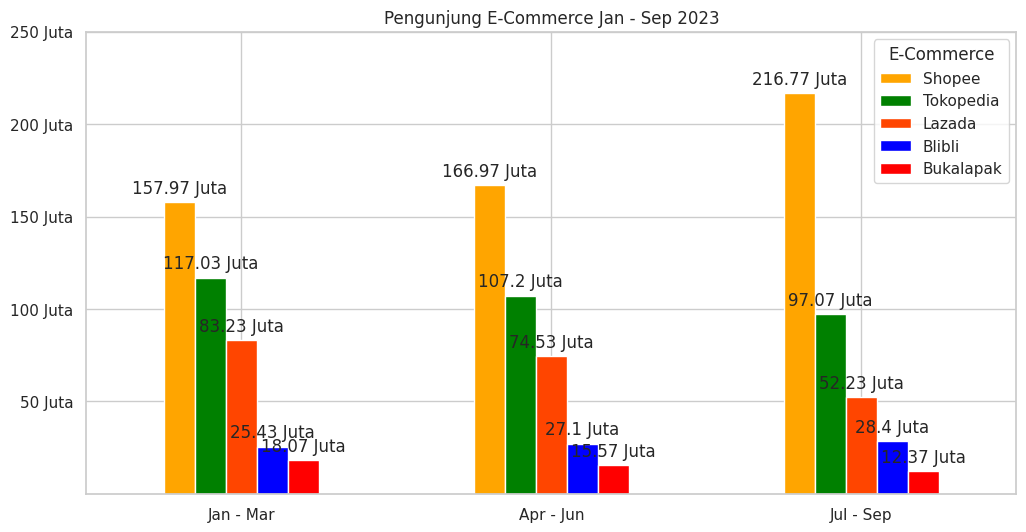

In [ ]:
df_4.set_index('nama_alias', inplace=True)
df_4_transposed = df_4.transpose()

colors = {'Shopee': 'orange', 'Tokopedia': 'green', 'Lazada': 'orangered', 'Blibli': 'blue', 'Bukalapak': 'red'}

ax = df_4_transposed.plot(kind='bar', figsize=(12, 6), rot=0, color=[colors[col] for col in df_4_transposed.columns])

for p in ax.patches:
    value = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'{value} Juta', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Jan - Mar', 'Apr - Jun', 'Jul - Sep'])

ax.legend(title='E-Commerce')

plt.title('Pengunjung E-Commerce Jan - Sep 2023')
plt.yticks([50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000], ['50 Juta', '100 Juta', '150 Juta', '200 Juta', '250 Juta'])

plt.show()

# (5) Jejak Karbon Kendaraan

## Collecting Data

Sumber Data : https://data.gov.au/dataset/ds-qld-32710aab-dc32-40a6-a09e-6e937632eda7/distribution/dist-qld-2017-indicator-3-4-0-3-1/details?q=carbon%20emission

In [ ]:
co2_transport = pd.read_csv('https://raw.githubusercontent.com/dinann1990/Final-Project/main/CO2%20by%20Transport.csv')

In [ ]:
co2_transport

,Category,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Domestic aviation,0.636,0.790,0.790,0.898,0.953,1.125,1.238,1.319,1.198,...,1.664,1.780,1.815,1.801,1.948,2.220,2.287,2.376,2.196,2.342
1,Cars,5.947,6.020,6.228,6.498,6.688,6.978,7.127,7.146,7.244,...,8.837,9.086,9.059,9.104,9.114,9.450,9.384,9.144,9.532,10.123
2,Light commercial vehicles,1.293,1.296,1.343,1.408,1.461,1.541,1.598,1.631,1.674,...,2.525,2.680,2.800,2.949,2.971,3.048,3.091,3.106,3.160,3.555
3,Heavy duty trucks and buses,2.182,2.174,2.257,2.397,2.532,2.740,2.923,3.082,3.224,...,4.321,4.363,4.394,4.397,4.673,5.000,5.109,5.324,5.350,5.361
4,Motorcycles,0.035,0.036,0.037,0.038,0.039,0.040,0.041,0.041,0.041,...,0.061,0.067,0.070,0.074,0.065,0.058,0.061,0.057,0.065,0.069
5,Railways,0.379,0.380,0.284,0.277,0.284,0.287,0.282,0.279,0.277,...,0.459,0.800,0.800,0.790,0.755,0.788,0.827,0.818,0.663,0.630
6,Navigation,0.661,0.694,0.657,0.638,0.602,0.753,0.684,0.732,0.761,...,1.031,0.385,0.745,0.725,0.616,0.537,0.334,0.340,0.360,0.362
7,Other,0.053,0.053,0.059,0.059,0.045,0.039,0.039,0.039,0.039,...,0.078,0.083,0.053,0.064,0.102,0.110,0.125,0.108,0.097,0.073
8,Total,11.186,11.443,11.719,12.213,12.603,13.504,13.931,14.270,14.458,...,18.976,19.245,19.736,19.903,20.380,21.219,21.226,21.240,21.423,22.514


## Cleansing

In [ ]:
#missing data value
co2_transport.isnull().sum()

In [ ]:
co2_transport['Total'] = co2_transport.sum(axis=1)

<ipython-input-85-f9bf023a1f19>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
print(co2_transport[['Total']])

     Total
0   39.785
1  218.142
2   59.557
3   99.990
4    1.316
5   13.321
6   17.484
7    1.818
8  451.594


In [ ]:
# create dataframe total co2 created each transport
co2_transport_total = pd.DataFrame({'Transport' : ['Domestic Aviation', 'Cars', 'Light Commercial Vehicles', 'Heavy Duty Trucks and Buses', 'Motorcycles', 'Railways','Navigation','Other', 'Total'],
                          'Total Carbon Dioxide' : [39.785
,218.142
,59.557
,99.990
,1.316
,13.321
,17.484
,1.818
,451.594]})
co2_transport_total

,Transport,Total Carbon Dioxide
0,Domestic Aviation,39.785
1,Cars,218.142
2,Light Commercial Vehicles,59.557
3,Heavy Duty Trucks and Buses,99.990
4,Motorcycles,1.316
5,Railways,13.321
6,Navigation,17.484
7,Other,1.818
8,Total,451.594


In [ ]:
co2_transport_total_bersih = co2_transport_total.drop(co2_transport_total[co2_transport_total['Transport'] == 'Total'].index)
co2_transport_total_bersih

,Transport,Total Carbon Dioxide
0,Domestic Aviation,39.785
1,Cars,218.142
2,Light Commercial Vehicles,59.557
3,Heavy Duty Trucks and Buses,99.990
4,Motorcycles,1.316
5,Railways,13.321
6,Navigation,17.484
7,Other,1.818


In [ ]:
#mencari rata-rata gas karbon per kendaraan tiap tahunnya, dengan (total karbon : selisih tahun)

co2_transport_rerata = co2_transport_total_bersih['Total Carbon Dioxide']/27
co2_transport_rerata

0    1.473519
1    8.079333
2    2.205815
3    3.703333
4    0.048741
5    0.493370
6    0.647556
7    0.067333
Name: Total Carbon Dioxide, dtype: float64

In [ ]:
# create dataframe total co2 created each transport
co2_transport_rerata = pd.DataFrame({'Transport' : ['Domestic Aviation', 'Cars', 'Light Commercial Vehicles', 'Heavy Duty Trucks and Buses', 'Motorcycles', 'Railways','Navigation','Other'],
                          'Average Carbon Dioxide per Year' : [ 1.473519
,8.079333
,2.205815
,3.703333
,0.048741
,0.493370
,0.647556
,0.067333]})
co2_transport_rerata

,Transport,Average Carbon Dioxide per Year
0,Domestic Aviation,1.473519
1,Cars,8.079333
2,Light Commercial Vehicles,2.205815
3,Heavy Duty Trucks and Buses,3.703333
4,Motorcycles,0.048741
5,Railways,0.493370
6,Navigation,0.647556
7,Other,0.067333


## Visualization

### Total Gas Karbon per Transportasi

In [ ]:
bar_carbon = px.bar(co2_transport_total_bersih, x=co2_transport_total_bersih['Transport'], y=co2_transport_total_bersih['Total Carbon Dioxide'], color=co2_transport_total_bersih['Transport'], title='Total Gas Karbon per Transportasi')
bar_carbon

Berdasarkan hasil grafik barplot diatas dapat diketahui bahwa, transportasi yang menghasilkan emisi gas karbon terbanyak adalah mobil sebanyak 218.142 ton CO2 dan Motor sebanyak 1.316 ton CO2 selama periode waktu 1990-2016.

### Total Gas Karbon per Transportasi

In [ ]:
#create piechart label
labels = co2_transport_total_bersih['Transport']
values = co2_transport_total_bersih['Total Carbon Dioxide']

#create pie chart
co2_transport_pie = px.pie(names=labels, values=values, title='Total Gas Karbon per Transportasi')
co2_transport_pie

Berdasarkan hasil grafik piechart diatas dapat diketahui bahwa, transportasi mobil menduduki peringkat pertama dalam Entitas Transportasi lain dimana memiliki porsi sebanyak 48.3% dan Motor sebanyak 0.292% selama periode waktu 1990-2016.

### Rerata Gas Karbon per Transportasi per Tahun

In [ ]:
bar_carbon_avg = px.bar(co2_transport_rerata, x=co2_transport_rerata['Transport'], y=co2_transport_rerata['Average Carbon Dioxide per Year'], color=co2_transport_rerata['Transport'], title='Rerata Gas Karbon per Transportasi per Tahun')
bar_carbon_avg

Berdasarkan hasil grafik barplot diatas dapat diketahui bahwa transportasi yang menghasilkan emisi gas karbon terbanyak adalah mobil sebanyak 218.142 ton CO2 dan Motor sebanyak 1.316 ton CO2 selama periode waktu 1990-2016

In [ ]:
baris_hapus = ['Domestic aviation', 'Cars','Light commercial vehicles','Heavy duty trucks and buses','Motorcycles','Railways','Navigation','Other']

In [ ]:
total_per_year = co2_transport.drop(co2_transport[co2_transport['Category'].isin(baris_hapus)].index)
total_per_year

,Category,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
8,Total,11.186,11.443,11.719,12.213,12.603,13.504,13.931,14.27,14.458,...,19.245,19.736,19.903,20.38,21.219,21.226,21.24,21.423,22.514,451.594


In [ ]:
total_per_year.drop(['Total'], axis = 1, inplace = True)

In [ ]:
total_per_year

,Category,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8,Total,11.186,11.443,11.719,12.213,12.603,13.504,13.931,14.27,14.458,...,18.976,19.245,19.736,19.903,20.38,21.219,21.226,21.24,21.423,22.514


In [ ]:
#tuker baris jadi kolom dan sebaliknya
total_per_year_tuker = total_per_year.transpose().reset_index()

#rename
total_per_year_tuker.columns = ['Year', 'Value']

In [ ]:
total_per_year_tuker

,Year,Value
0,Category,Total
1,1990,11.186
2,1991,11.443
3,1992,11.719
4,1993,12.213
5,1994,12.603
6,1995,13.504
7,1996,13.931
8,1997,14.27
9,1998,14.458


In [ ]:
total_year_bersih = total_per_year_tuker.drop(total_per_year_tuker[total_per_year_tuker['Year'] == 'Category'].index)
total_year_bersih

,Year,Value
1,1990,11.186
2,1991,11.443
3,1992,11.719
4,1993,12.213
5,1994,12.603
6,1995,13.504
7,1996,13.931
8,1997,14.27
9,1998,14.458
10,1999,14.535


### Total Karbon Setiap Tahun

In [ ]:
px.line(total_year_bersih, x='Year', y='Value', title='Total Carbon Each Year', markers=True, line_shape='linear', color_discrete_sequence=['red'])

Grafik lineplot diatas menunjukkan total emisi gas karbon per tahun nya yang dihasilkan dari berbagai macam kendaraan, dimana kita dapat melihat bahwa terjadi kenaikan tiap tahunnya.

# (6) Jenis Sampah yang Paling Umum di Lautan

## Collecting Data

Sumber Data : https://ourworldindata.org/grapher/waste-items-ocean-region

In [ ]:
url = 'https://raw.githubusercontent.com/jeevallucas/waste-datasets/main/waste-items-ocean-region.csv'
df_1 = pd.read_csv(url)
df_1

,Entity,Code,Year,High income,East Asia and Pacific,South Asia,Latin America and the Carribean,Sub-Saharan Africa,North Africa and Middle East
0,Bottle lids,NaN,2021,NaN,NaN,NaN,NaN,2.8,NaN
1,Cans (drink),NaN,2021,8.0,3.4,4.1,4.6,7.4,6.8
2,Cans (food),NaN,2021,NaN,NaN,NaN,NaN,NaN,3.1
3,Clothing,NaN,2021,NaN,2.8,3.7,2.5,3.6,NaN
4,Fishing net,NaN,2021,NaN,2.7,3.8,NaN,NaN,NaN
5,Fishing related,NaN,2021,31.7,7.2,12.2,10.3,3.7,14.1
6,Fishing weights,NaN,2021,9.6,NaN,NaN,4.6,NaN,3.4
7,Food containers,NaN,2021,3.9,4.2,NaN,8.8,4.2,17.1
8,Glass bottles,NaN,2021,7.2,5.2,3.7,4.8,10.4,3.7
9,Industrial packaging,NaN,2021,NaN,NaN,3.0,NaN,NaN,NaN


## Cleansing

In [ ]:
df_1.drop(['Code', 'Year'], axis=1, inplace=True)
df_1

,Entity,High income,East Asia and Pacific,South Asia,Latin America and the Carribean,Sub-Saharan Africa,North Africa and Middle East
0,Bottle lids,NaN,NaN,NaN,NaN,2.8,NaN
1,Cans (drink),8.0,3.4,4.1,4.6,7.4,6.8
2,Cans (food),NaN,NaN,NaN,NaN,NaN,3.1
3,Clothing,NaN,2.8,3.7,2.5,3.6,NaN
4,Fishing net,NaN,2.7,3.8,NaN,NaN,NaN
5,Fishing related,31.7,7.2,12.2,10.3,3.7,14.1
6,Fishing weights,9.6,NaN,NaN,4.6,NaN,3.4
7,Food containers,3.9,4.2,NaN,8.8,4.2,17.1
8,Glass bottles,7.2,5.2,3.7,4.8,10.4,3.7
9,Industrial packaging,NaN,NaN,3.0,NaN,NaN,NaN


## Visualization

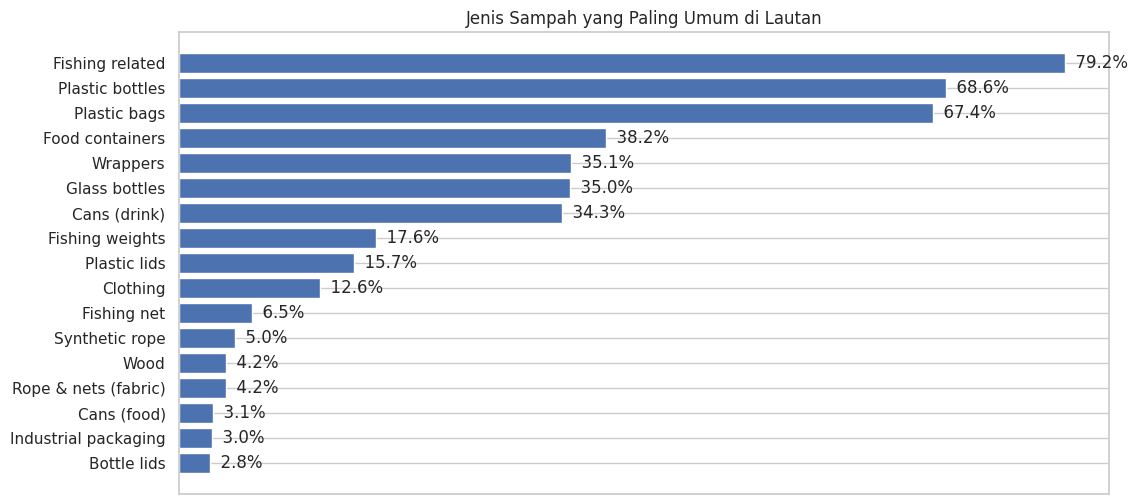

In [ ]:
df_1['Combined'] = df_1[[
    'High income',
    'East Asia and Pacific',
    'South Asia',
    'Latin America and the Carribean',
    'Sub-Saharan Africa',
    'North Africa and Middle East'
]].sum(axis=1)

df_1_combined = df_1[['Entity', 'Combined']].dropna()
df_1_combined = df_1_combined.sort_values(by='Combined')

plt.figure(figsize=(12, 6))
bars = plt.barh(df_1_combined['Entity'], df_1_combined['Combined'])
plt.title('Jenis Sampah yang Paling Umum di Lautan')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'  {bar.get_width():.1f}%', va='center')

plt.xticks([])
plt.show()

df_1_combined.to_csv('cleaned_waste-items-ocean-region.csv', index=False)

# (7) Nasib Limbah Plastik Seiring Waktu (Asia, kecuali Cina dan India)

## Collecting Data

Sumber Data : https://ourworldindata.org/grapher/share-plastic-fate

In [ ]:
url = 'https://raw.githubusercontent.com/jeevallucas/waste-datasets/main/share-plastic-fate.csv'
df_2 = pd.read_csv(url)
df_2

,Entity,Code,Year,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


## Visualization

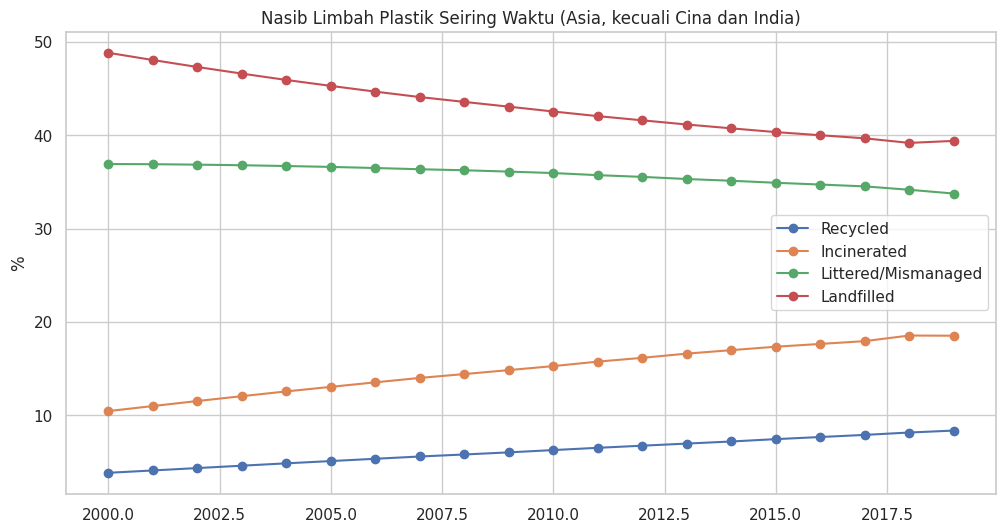

In [ ]:
region_data = df_2[df_2['Entity'] == 'Asia (excl. China and India)']

plt.figure(figsize=(12, 6))
plt.plot(region_data['Year'], region_data['Share of waste recycled from total regional waste'], label='Recycled', marker='o')
plt.plot(region_data['Year'], region_data['Share of waste incinerated from total regional waste'], label='Incinerated', marker='o')
plt.plot(region_data['Year'], region_data['Share of littered and mismanaged from total regional waste'], label='Littered/Mismanaged', marker='o')
plt.plot(region_data['Year'], region_data['Share of waste landfilled from total regional waste'], label='Landfilled', marker='o')

plt.ylabel('%')
plt.title('Nasib Limbah Plastik Seiring Waktu (Asia, kecuali Cina dan India)')
plt.legend()
plt.grid(True)
plt.show()

# (8) Jenis Sampah Yang Paling Sering Ditemukan di Sungai dan Lautan

## Collecting Data

Sumber Data : https://ourworldindata.org/grapher/most-common-waste-rivers-oceans

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/most-common-waste-rivers-oceans.csv')
df3

,Entity,Code,Year,Share of aquatic waste
0,Bags,NaN,2021,14.057110
1,Cans (drinks),NaN,2021,3.167243
2,Fishing related,NaN,2021,7.587690
3,Food containers / cutlery,NaN,2021,9.390787
4,Glass bottles,NaN,2021,3.393414
5,Industrial packaging,NaN,2021,3.447398
6,Plastic bottles,NaN,2021,11.888572
7,Plastic lids,NaN,2021,6.083896
8,Synthetic rope,NaN,2021,7.883047
9,Wrappers,NaN,2021,9.052225


In [ ]:
df3.info

<bound method DataFrame.info of                       Entity  Code  Year  Share of aquatic waste
0                       Bags   NaN  2021               14.057110
1              Cans (drinks)   NaN  2021                3.167243
2            Fishing related   NaN  2021                7.587690
3  Food containers / cutlery   NaN  2021                9.390787
4              Glass bottles   NaN  2021                3.393414
5       Industrial packaging   NaN  2021                3.447398
6            Plastic bottles   NaN  2021               11.888572
7               Plastic lids   NaN  2021                6.083896
8             Synthetic rope   NaN  2021                7.883047
9                   Wrappers   NaN  2021                9.052225>

In [ ]:
Waste_river_ocean = df3["Share of aquatic waste"]
mean_waste = Waste_river_ocean.mean()
print("Waste river ocean:", mean_waste)

Waste river ocean: 7.595138147400002


## Visualization

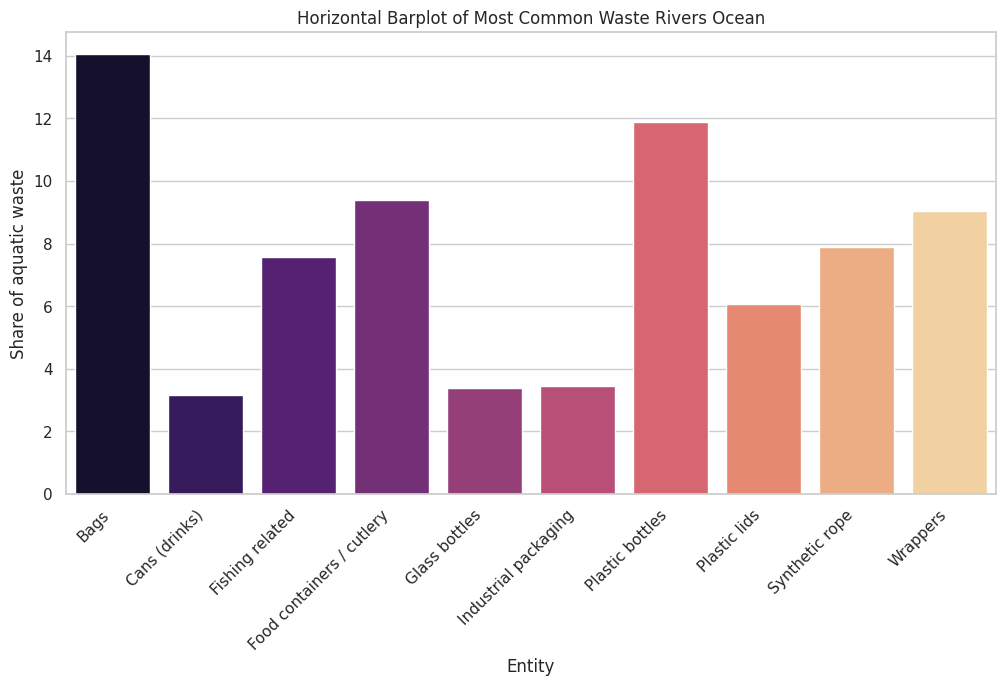

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Entity', y='Share of aquatic waste', data=df3, palette="magma")

plt.xlabel("Entity")
plt.ylabel("Share of aquatic waste")
plt.title("Horizontal Barplot of Most Common Waste Rivers Ocean")
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
average_waste = df3.groupby('Entity')['Share of aquatic waste'].mean().reset_index()
average_waste

,Entity,Share of aquatic waste
0,Bags,14.057110
1,Cans (drinks),3.167243
2,Fishing related,7.587690
3,Food containers / cutlery,9.390787
4,Glass bottles,3.393414
5,Industrial packaging,3.447398
6,Plastic bottles,11.888572
7,Plastic lids,6.083896
8,Synthetic rope,7.883047
9,Wrappers,9.052225


<ipython-input-112-9f27958d5bd1>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Share of aquatic waste', ylabel='Density'>

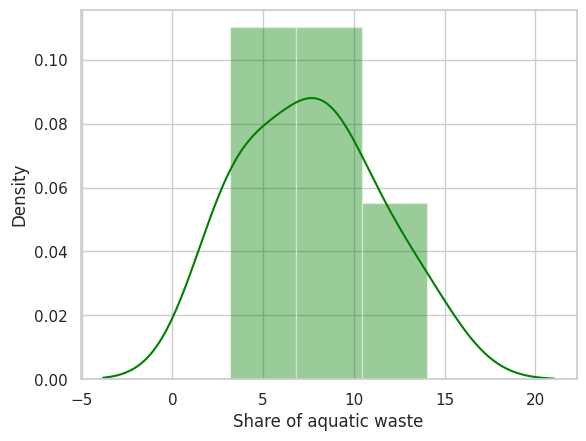

In [ ]:
sns.distplot(average_waste['Share of aquatic waste'], color='green')

# (9) Sampah di Laut dan Sungai Berdasarkan Item

Sumber Data : https://ourworldindata.org/grapher/ocean-waste-by-item  

In [ ]:
df4 = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/ocean-waste-by-item.csv')
df4

,Entity,Code,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,NaN,2021,NaN,6.1,NaN,NaN,NaN,NaN
1,Cans (drink),NaN,2021,NaN,NaN,NaN,NaN,NaN,10.2
2,Cans (food),NaN,2021,NaN,4.0,NaN,NaN,NaN,NaN
3,Clothing,NaN,2021,NaN,NaN,3.9,NaN,NaN,2.2
4,Cotton buds,NaN,2021,0.7,NaN,NaN,NaN,NaN,NaN
5,Cups & lids,NaN,2021,1.1,NaN,NaN,4.0,1.2,NaN
6,Fishing net,NaN,2021,NaN,NaN,NaN,2.4,4.4,2.3
7,Fishing related,NaN,2021,NaN,7.7,NaN,1.7,24.4,7.2
8,Food containers,NaN,2021,35.8,NaN,15.4,NaN,NaN,7.0
9,Glass bottles,NaN,2021,NaN,11.1,3.8,NaN,NaN,2.8


## Cleansing

In [ ]:
# Remove the 'Code' column
df4.drop(['Code'], axis = 1, inplace = True)

# Handle missing values
df4.fillna(value = 0, inplace = True)

df4

,Entity,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,2021,0.0,6.1,0.0,0.0,0.0,0.0
1,Cans (drink),2021,0.0,0.0,0.0,0.0,0.0,10.2
2,Cans (food),2021,0.0,4.0,0.0,0.0,0.0,0.0
3,Clothing,2021,0.0,0.0,3.9,0.0,0.0,2.2
4,Cotton buds,2021,0.7,0.0,0.0,0.0,0.0,0.0
5,Cups & lids,2021,1.1,0.0,0.0,4.0,1.2,0.0
6,Fishing net,2021,0.0,0.0,0.0,2.4,4.4,2.3
7,Fishing related,2021,0.0,7.7,0.0,1.7,24.4,7.2
8,Food containers,2021,35.8,0.0,15.4,0.0,0.0,7.0
9,Glass bottles,2021,0.0,11.1,3.8,0.0,0.0,2.8


In [ ]:
df4.isnull().sum()

Entity              0
Year                0
River Waters        0
Riverbed            0
Shoreline           0
Nearshore Waters    0
Offshore Waters     0
Deep Seafloor       0
dtype: int64

## Visualization

#### River Waters

In [ ]:
# Filter data yang memiliki nilai River Waters tidak sama dengan 0
filtered_data1 = df4[df4['River Waters'] != 0]

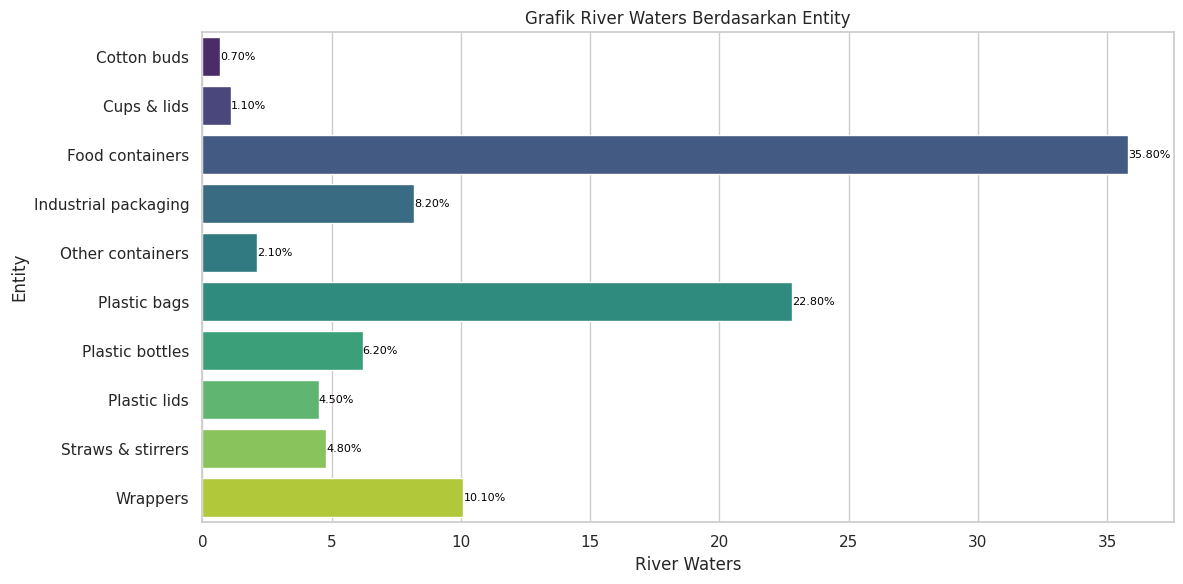

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot1 = sns.barplot(x='River Waters', y='Entity', data=filtered_data1, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot1.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Grafik River Waters Berdasarkan Entity')
plt.xlabel('River Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Riverbed

In [ ]:
# Filter data yang memiliki nilai Riverbed tidak sama dengan 0
filtered_data2 = df4[df4['Riverbed'] != 0]

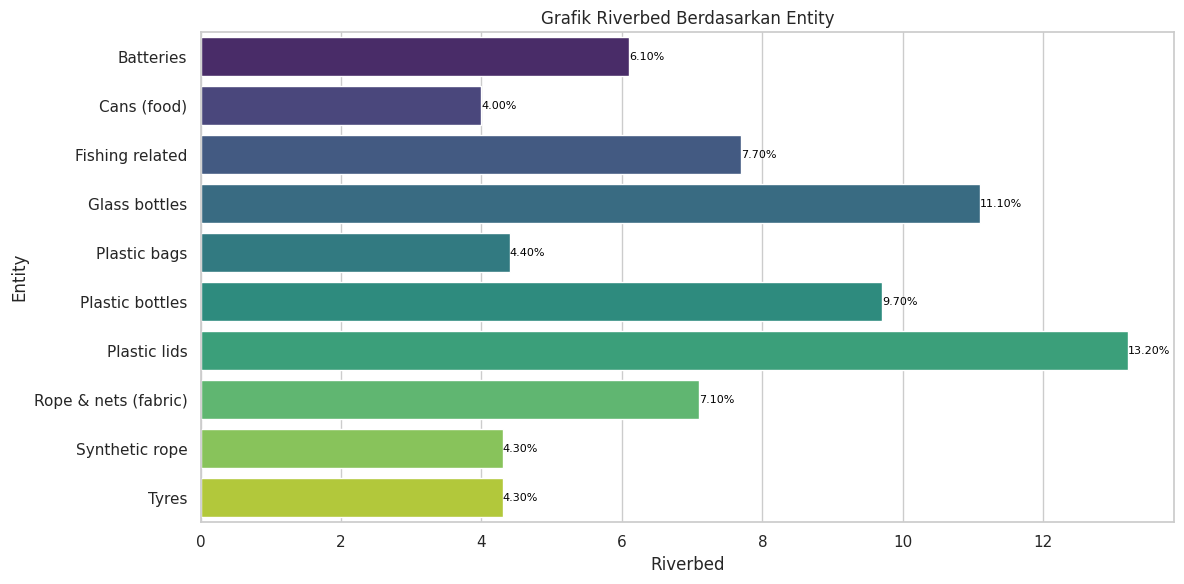

In [ ]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot2 = sns.barplot(x='Riverbed', y='Entity', data=filtered_data2, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot2.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Grafik Riverbed Berdasarkan Entity')
plt.xlabel('Riverbed')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Shoreline

In [ ]:
# Filter data yang memiliki nilai Shoreline tidak sama dengan 0
filtered_data3 = df4[df4['Shoreline'] != 0]

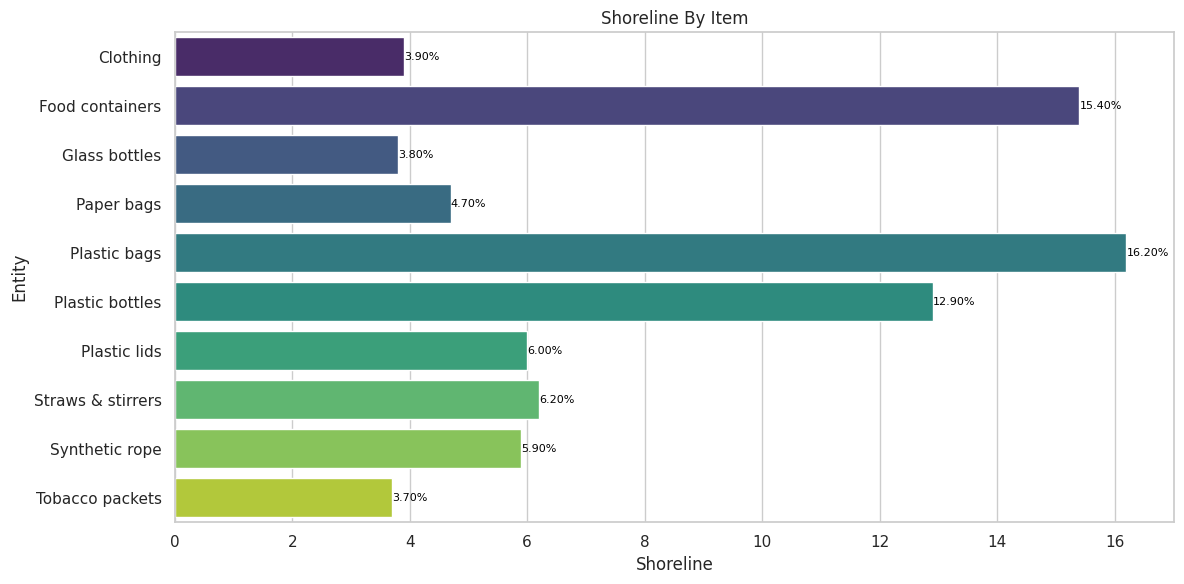

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot3 = sns.barplot(x='Shoreline', y='Entity', data=filtered_data3, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot3.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Shoreline By Item')
plt.xlabel('Shoreline')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()



#### Nearshore Waters

In [ ]:
# Filter data yang memiliki nilai Nearshore Waters tidak sama dengan 0
filtered_data4 = df4[df4['Nearshore Waters'] != 0]

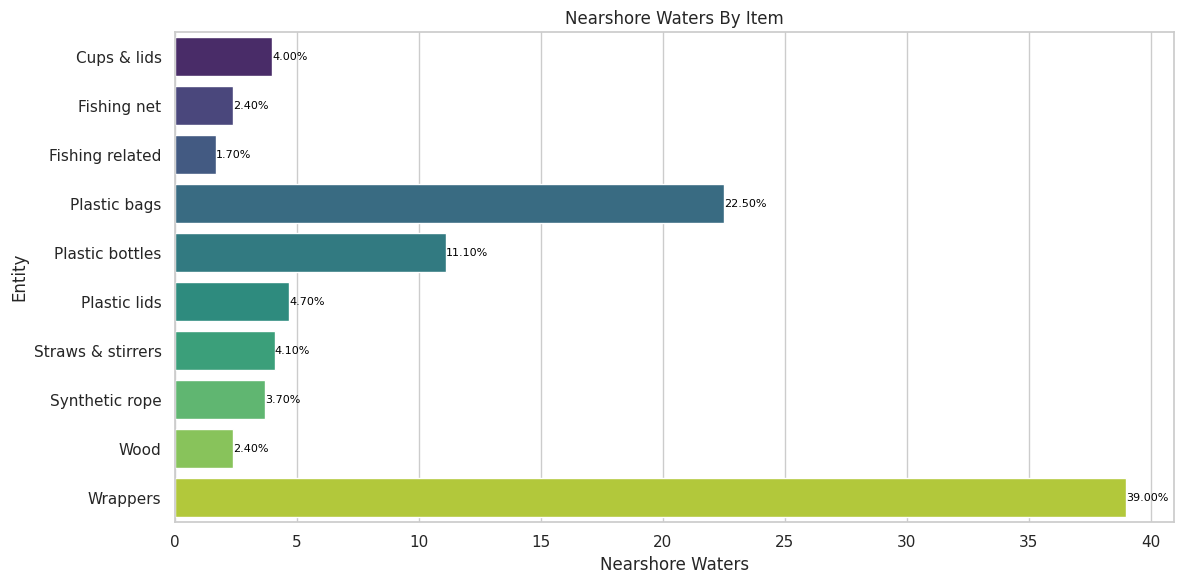

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot4 = sns.barplot(x='Nearshore Waters', y='Entity', data=filtered_data4, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot4.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Nearshore Waters By Item')
plt.xlabel('Nearshore Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Offshore Waters

In [ ]:
# Filter data yang memiliki nilai Offshore Waters tidak sama dengan 0
filtered_data5 = df4[df4['Offshore Waters'] != 0]

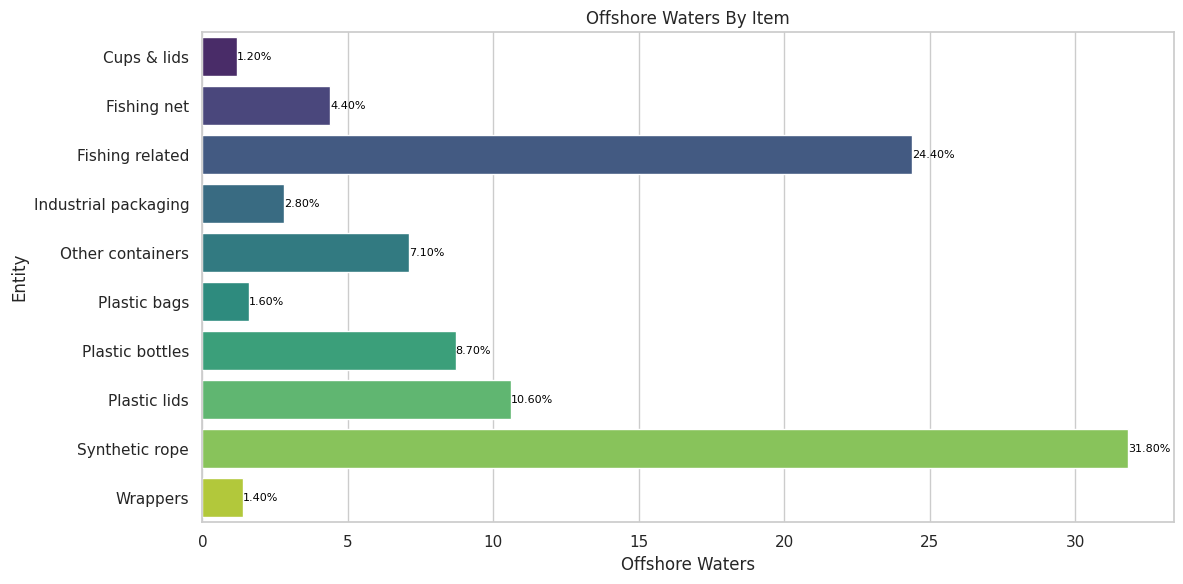

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot5 = sns.barplot(x='Offshore Waters', y='Entity', data=filtered_data5, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot5.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Offshore Waters By Item')
plt.xlabel('Offshore Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Deep Seafloor

In [ ]:
# Filter data yang memiliki nilai Deep Seafloor tidak sama dengan 0
filtered_data6 = df4[df4['Deep Seafloor'] != 0]

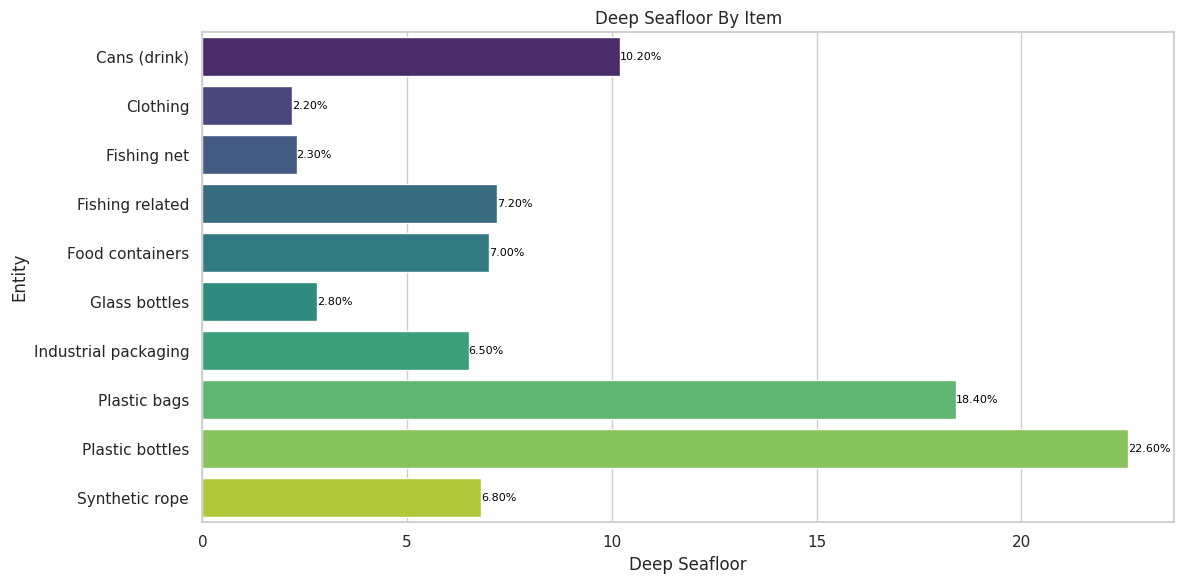

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot6 = sns.barplot(x='Deep Seafloor', y='Entity', data=filtered_data6, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot6.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Deep Seafloor By Item')
plt.xlabel('Deep Seafloor')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### All of Ocean

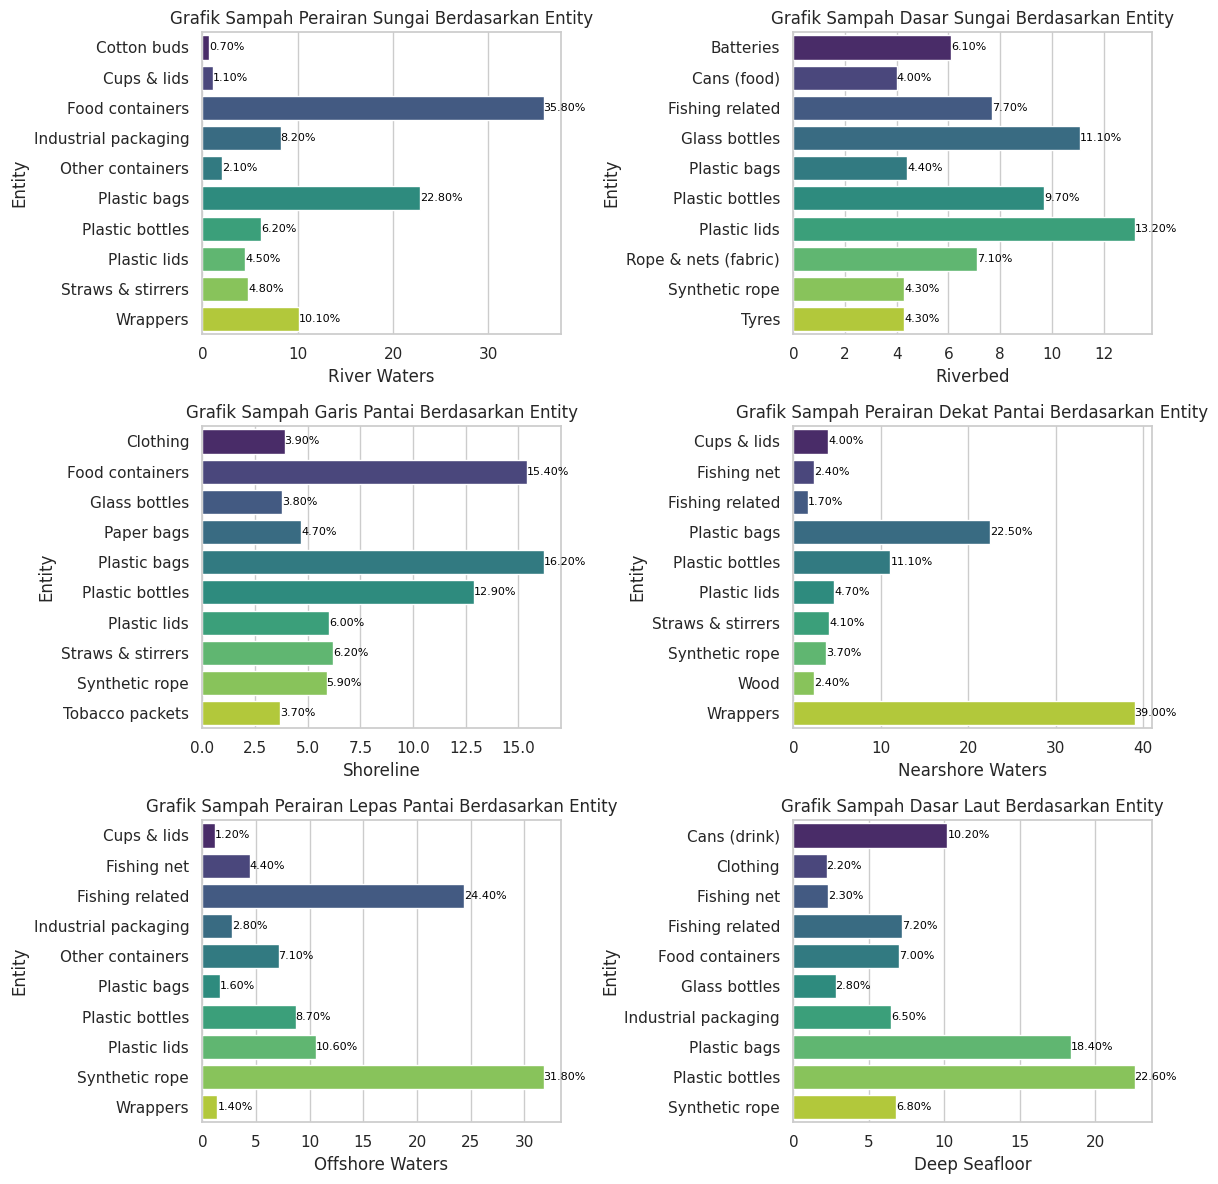

In [ ]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Buat figure dan axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot pertama
plot1 = sns.barplot(ax=axes[0, 0], x='River Waters', y='Entity', data=filtered_data1, palette='viridis', orient='h')
for bar in plot1.patches:
    axes[0, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[0, 0].set_title('Grafik Sampah Perairan Sungai Berdasarkan Entity')
axes[0, 0].set_xlabel('River Waters')
axes[0, 0].set_ylabel('Entity')

# Plot kedua
plot2 = sns.barplot(ax=axes[0, 1], x='Riverbed', y='Entity', data=filtered_data2, palette='viridis', orient='h')
for bar in plot2.patches:
    axes[0, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[0, 1].set_title('Grafik Sampah Dasar Sungai Berdasarkan Entity')
axes[0, 1].set_xlabel('Riverbed')
axes[0, 1].set_ylabel('Entity')

# Plot ketiga
plot3 = sns.barplot(ax=axes[1, 0], x='Shoreline', y='Entity', data=filtered_data3, palette='viridis', orient='h')
for bar in plot3.patches:
    axes[1, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[1, 0].set_title('Grafik Sampah Garis Pantai Berdasarkan Entity')
axes[1, 0].set_xlabel('Shoreline')
axes[1, 0].set_ylabel('Entity')

# Plot keempat
plot4 = sns.barplot(ax=axes[1, 1], x='Nearshore Waters', y='Entity', data=filtered_data4, palette='viridis', orient='h')
for bar in plot4.patches:
    axes[1, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[1, 1].set_title('Grafik Sampah Perairan Dekat Pantai Berdasarkan Entity')
axes[1, 1].set_xlabel('Nearshore Waters')
axes[1, 1].set_ylabel('Entity')

# Plot kelima
plot5 = sns.barplot(ax=axes[2, 0], x='Offshore Waters', y='Entity', data=filtered_data5, palette='viridis', orient='h')
for bar in plot5.patches:
    axes[2, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[2, 0].set_title('Grafik Sampah Perairan Lepas Pantai Berdasarkan Entity')
axes[2, 0].set_xlabel('Offshore Waters')
axes[2, 0].set_ylabel('Entity')

# Plot keenam
plot6 = sns.barplot(ax=axes[2, 1], x='Deep Seafloor', y='Entity', data=filtered_data6, palette='viridis', orient='h')
for bar in plot6.patches:
    axes[2, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[2, 1].set_title('Grafik Sampah Dasar Laut Berdasarkan Entity')
axes[2, 1].set_xlabel('Deep Seafloor')
axes[2, 1].set_ylabel('Entity')

# Sesuaikan layout
plt.tight_layout()

# Tampilkan grafik
plt.show()


Berdasarkan grafik diatas, dapat disimpulkan bahwa sampah laut didominasi oleh sampah plastik. Sampah plastik ditemukan di semua lokasi, mulai dari perairan sungai, dasar sungai, garis pantai, perairan dekat pantai, perairan lepas pantai, hingga dasar laut.

# (10) Municipal Waste (Sampah Komunal) Tersebar di Seluruh Dunia

Sumber Data : https://data.oecd.org/waste/municipal-waste.htm


In [ ]:
df5 = pd.read_csv('https://raw.githubusercontent.com/dinann1990/Final-Project/main/Mun%20Waste%20KG.csv')
df5

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WASTEMUN,TOT,KG_CAP,A,2000,693.685,NaN
1,AUS,WASTEMUN,TOT,KG_CAP,A,2007,618.683,NaN
2,AUS,WASTEMUN,TOT,KG_CAP,A,2008,616.329,NaN
3,AUS,WASTEMUN,TOT,KG_CAP,A,2009,615.132,NaN
4,AUS,WASTEMUN,TOT,KG_CAP,A,2010,615.498,NaN
...,...,...,...,...,...,...,...,...
1044,UKR,WASTEMUN,TOT,KG_CAP,A,2015,255.472,NaN
1045,UKR,WASTEMUN,TOT,KG_CAP,A,2016,257.901,NaN
1046,UKR,WASTEMUN,TOT,KG_CAP,A,2017,252.393,NaN
1047,UKR,WASTEMUN,TOT,KG_CAP,A,2018,266.772,NaN


In [ ]:
#count numerical and categorical data
num_cols = df5._get_numeric_data().columns
cat_cols = list(set(df5.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['TIME', 'Value', 'Flag Codes'], dtype='object')
Categorical columns:  ['INDICATOR', 'SUBJECT', 'FREQUENCY', 'MEASURE', 'LOCATION']


In [ ]:
#missing data value
df5.isnull().sum()

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    1049
dtype: int64

## Cleansing

In [ ]:
#finding fix ration between each country with the least dataset country TIME (Indonesia)
inter_rat = df5[(df5['TIME'] >= 2007) & (df5['TIME'] <= 2012)]
inter_rat

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1,AUS,WASTEMUN,TOT,KG_CAP,A,2007,618.683,NaN
2,AUS,WASTEMUN,TOT,KG_CAP,A,2008,616.329,NaN
3,AUS,WASTEMUN,TOT,KG_CAP,A,2009,615.132,NaN
4,AUS,WASTEMUN,TOT,KG_CAP,A,2010,615.498,NaN
5,AUS,WASTEMUN,TOT,KG_CAP,A,2011,603.065,NaN
...,...,...,...,...,...,...,...,...
1028,MDA,WASTEMUN,TOT,KG_CAP,A,2011,120.258,NaN
1029,MDA,WASTEMUN,TOT,KG_CAP,A,2012,124.258,NaN
1039,UKR,WASTEMUN,TOT,KG_CAP,A,2010,213.767,NaN
1040,UKR,WASTEMUN,TOT,KG_CAP,A,2011,227.535,NaN


In [ ]:
# drop column
data_interbersih = df5.drop(['SUBJECT','FREQUENCY','Flag Codes'], axis = 1)
data_interbersih

,LOCATION,INDICATOR,MEASURE,TIME,Value
0,AUS,WASTEMUN,KG_CAP,2000,693.685
1,AUS,WASTEMUN,KG_CAP,2007,618.683
2,AUS,WASTEMUN,KG_CAP,2008,616.329
3,AUS,WASTEMUN,KG_CAP,2009,615.132
4,AUS,WASTEMUN,KG_CAP,2010,615.498
...,...,...,...,...,...
1044,UKR,WASTEMUN,KG_CAP,2015,255.472
1045,UKR,WASTEMUN,KG_CAP,2016,257.901
1046,UKR,WASTEMUN,KG_CAP,2017,252.393
1047,UKR,WASTEMUN,KG_CAP,2018,266.772


### Data Grouping

In [ ]:
inter_stateavg = df5.groupby('LOCATION')['Value'].mean()
inter_stateavg = inter_stateavg.reset_index()
inter_stateavg

,LOCATION,Value
0,ARG,401.860667
1,ARM,141.650409
2,AUS,584.103857
3,AUT,593.325238
4,AZE,182.747727
5,BEL,480.246455
6,BGR,516.020619
7,BLR,355.381722
8,BRA,301.063000
9,CHE,700.069409


In [ ]:
inter_yearavg = df5.groupby('TIME')['Value'].mean()
inter_yearavg = inter_yearavg.reset_index()
inter_yearavg

,TIME,Value
0,2000,451.313957
1,2001,430.882444
2,2002,446.916370
3,2003,439.432681
4,2004,435.733714
5,2005,432.551163
6,2006,452.095625
7,2007,447.168120
8,2008,452.798388
9,2009,435.808900


In [ ]:
sampah_max = data_interbersih.groupby('LOCATION')['Value'].max().reset_index()
sampah_max

,LOCATION,Value
0,ARG,464.074
1,ARM,204.305
2,AUS,693.685
3,AUT,834.152
4,AZE,250.461
5,BEL,761.300
6,BGR,611.737
7,BLR,422.515
8,BRA,331.268
9,CHE,739.179


In [ ]:
ratio_avg = inter_rat.groupby('LOCATION')['Value'].mean()
ratio_avg = ratio_avg.reset_index()
ratio_avg

,LOCATION,Value
0,ARG,391.474000
1,ARM,134.141500
2,AUS,610.954500
3,AUT,583.678667
4,AZE,176.970667
5,BEL,466.731000
6,BGR,545.195500
7,BLR,345.797333
8,BRA,276.039200
9,CHE,711.485667


## Visualization

In [ ]:
# create barplot lainnya
bar_inter = px.bar(inter_stateavg, x='LOCATION', y='Value', color='LOCATION', title='Distribution of Waste')
bar_inter

In [ ]:
# create barplot lainnya
bar_intermax = px.bar(sampah_max, x='LOCATION', y='Value', color='LOCATION', title='Distribution of Waste')
bar_intermax

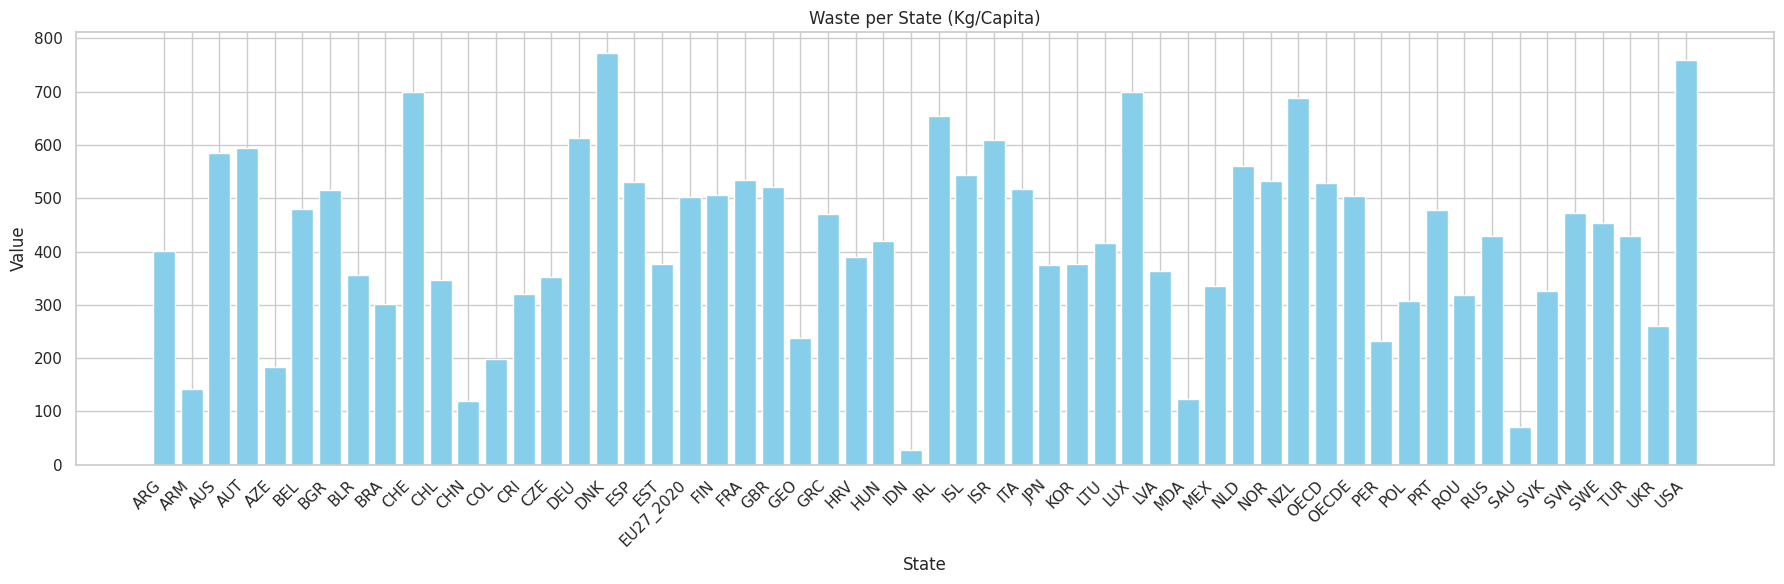

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(inter_stateavg['LOCATION'], inter_stateavg['Value'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Waste per State (Kg/Capita)')
plt.xticks(rotation=45, ha='right')  # Optional: Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# create barplot lainnya
bar_fix_ratio = px.bar(ratio_avg, x='LOCATION', y='Value', color='LOCATION', title='Distribution of Waste 2007-2012')
bar_fix_ratio

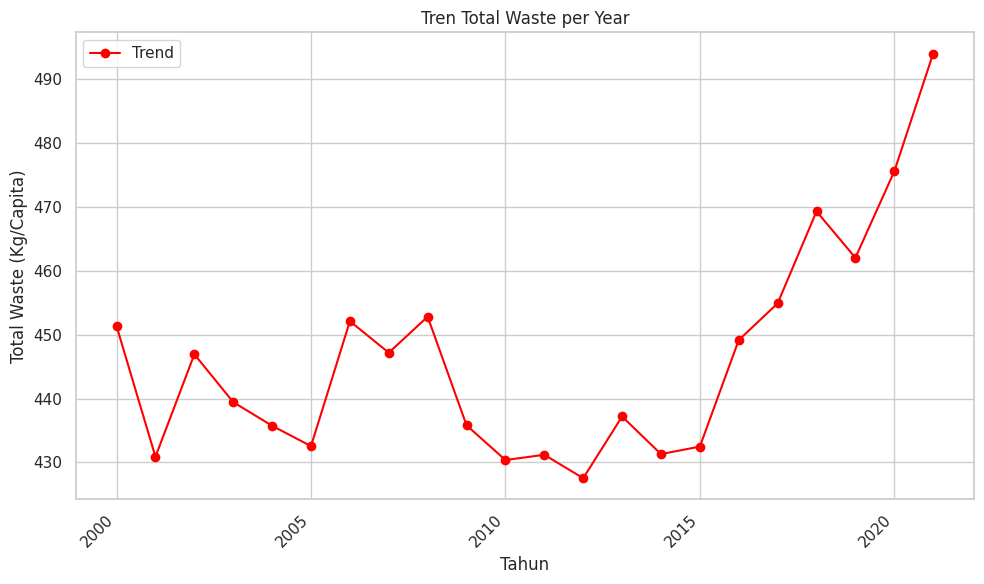

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(inter_yearavg['TIME'], inter_yearavg['Value'], marker='o', color='red', label='Trend')
plt.xlabel('Tahun')
plt.ylabel('Total Waste (Kg/Capita)')
plt.title('Tren Total Waste per Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Optional: Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

# (11) Penghematan Karbon Kendaraan Listrik

In [ ]:
# Diketahui
jumlah_kendaraan_listrik_tahun_pertama = 200
jarak_tempuh_per_tahun = 15000  # km
konsumsi_bbm_per_km = 1 / 10  # liter/km (10 km/liter)
konsumsi_listrik_per_km = 0.2  # kWh/km (5 km per 1 kWh)

# Emisi CO2 per liter BBM dan per kWh listrik
emisi_co2_per_liter_bbm = 2.4  # kg CO2e
emisi_co2_per_kWh_listrik = 1.02  # kg CO2e

# Perhitungan
# Konsumsi BBM dan Listrik per Kendaraan per Tahun
konsumsi_bbm_per_tahun_per_kendaraan = jarak_tempuh_per_tahun * konsumsi_bbm_per_km
konsumsi_listrik_per_tahun_per_kendaraan = jarak_tempuh_per_tahun * konsumsi_listrik_per_km

# Emisi CO2 per Kendaraan per Tahun untuk BBM dan Listrik
emisi_co2_bbm_per_tahun_per_kendaraan = konsumsi_bbm_per_tahun_per_kendaraan * emisi_co2_per_liter_bbm
emisi_co2_listrik_per_tahun_per_kendaraan = konsumsi_listrik_per_tahun_per_kendaraan * emisi_co2_per_kWh_listrik

# Total Emisi CO2 untuk Semua Kendaraan (BBM vs Listrik)
total_emisi_co2_bbm = emisi_co2_bbm_per_tahun_per_kendaraan * jumlah_kendaraan_listrik_tahun_pertama
total_emisi_co2_listrik = emisi_co2_listrik_per_tahun_per_kendaraan * jumlah_kendaraan_listrik_tahun_pertama

# Penghematan CO2
penghematan_co2_tahun_pertama = total_emisi_co2_bbm - total_emisi_co2_listrik

konsumsi_bbm_per_tahun_per_kendaraan, konsumsi_listrik_per_tahun_per_kendaraan, emisi_co2_bbm_per_tahun_per_kendaraan, emisi_co2_listrik_per_tahun_per_kendaraan, total_emisi_co2_bbm, total_emisi_co2_listrik, penghematan_co2_tahun_pertama


(1500.0, 3000.0, 3600.0, 3060.0, 720000.0, 612000.0, 108000.0)

In [ ]:
# Diketahui penambahan 50 kendaraan listrik setiap tahun
penambahan_kendaraan_per_tahun = 50

# Inisialisasi total penghematan CO2
total_penghematan_co2 = penghematan_co2_tahun_pertama  # Tahun 2022
jumlah_kendaraan_listrik = jumlah_kendaraan_listrik_tahun_pertama  # Awal tahun 2022

# Perhitungan untuk tahun 2023 hingga 2025
penghematan_co2_tahunan = []

for tahun in range(2023, 2026):
    # Tambah jumlah kendaraan listrik
    jumlah_kendaraan_listrik += penambahan_kendaraan_per_tahun

    # Hitung total emisi CO2 untuk BBM dan Listrik
    total_emisi_co2_bbm_tahunan = emisi_co2_bbm_per_tahun_per_kendaraan * jumlah_kendaraan_listrik
    total_emisi_co2_listrik_tahunan = emisi_co2_listrik_per_tahun_per_kendaraan * jumlah_kendaraan_listrik

    # Hitung penghematan CO2 untuk tahun tersebut
    penghematan_co2 = total_emisi_co2_bbm_tahunan - total_emisi_co2_listrik_tahunan
    penghematan_co2_tahunan.append((tahun, penghematan_co2))

    # Tambahkan ke total penghematan CO2
    total_penghematan_co2 += penghematan_co2

penghematan_co2_tahunan, total_penghematan_co2


([(2023, 135000.0), (2024, 162000.0), (2025, 189000.0)], 594000.0)

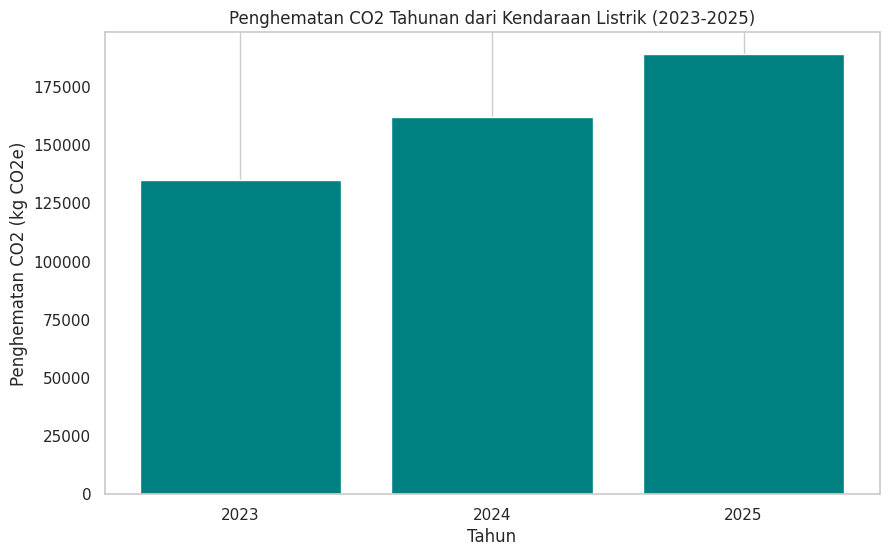

In [ ]:
import matplotlib.pyplot as plt

# Data dari penghematan CO2 tahunan
tahunan = [2023, 2024, 2025]
penghematan = [penghematan_co2_tahunan[0][1], penghematan_co2_tahunan[1][1], penghematan_co2_tahunan[2][1]]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(tahunan, penghematan, color='teal')
plt.title('Penghematan CO2 Tahunan dari Kendaraan Listrik (2023-2025)')
plt.xlabel('Tahun')
plt.ylabel('Penghematan CO2 (kg CO2e)')
plt.xticks(tahunan)
plt.grid(axis='y')

# Menampilkan grafik
plt.show()


In [ ]:
# Menghitung kembali data yang diberikan

# Inisialisasi variabel
jumlah_kendaraan_listrik_tahun_pertama = 200
jarak_tempuh_per_tahun = 15000  # km
konsumsi_bbm_per_km = 1 / 10  # liter/km (10 km/liter)
konsumsi_listrik_per_km = 0.2  # kWh/km (5 km per 1 kWh)

# Emisi CO2 per liter BBM dan per kWh listrik
emisi_co2_per_liter_bbm = 2.4  # kg CO2e
emisi_co2_per_kWh_listrik = 1.02  # kg CO2e

# Perhitungan
konsumsi_bbm_per_tahun_per_kendaraan = jarak_tempuh_per_tahun * konsumsi_bbm_per_km
konsumsi_listrik_per_tahun_per_kendaraan = jarak_tempuh_per_tahun * konsumsi_listrik_per_km

emisi_co2_bbm_per_tahun_per_kendaraan = konsumsi_bbm_per_tahun_per_kendaraan * emisi_co2_per_liter_bbm
emisi_co2_listrik_per_tahun_per_kendaraan = konsumsi_listrik_per_tahun_per_kendaraan * emisi_co2_per_kWh_listrik

total_emisi_co2_bbm = emisi_co2_bbm_per_tahun_per_kendaraan * jumlah_kendaraan_listrik_tahun_pertama
total_emisi_co2_listrik = emisi_co2_listrik_per_tahun_per_kendaraan * jumlah_kendaraan_listrik_tahun_pertama

penghematan_co2_tahun_pertama = total_emisi_co2_bbm - total_emisi_co2_listrik

# Diketahui penambahan 50 kendaraan listrik setiap tahun
penambahan_kendaraan_per_tahun = 50

# Inisialisasi total penghematan CO2
total_penghematan_co2 = penghematan_co2_tahun_pertama
jumlah_kendaraan_listrik = jumlah_kendaraan_listrik_tahun_pertama

# Perhitungan untuk tahun 2023 hingga 2025
penghematan_co2_tahunan = []

for tahun in range(2023, 2026):
    jumlah_kendaraan_listrik += penambahan_kendaraan_per_tahun
    total_emisi_co2_bbm_tahunan = emisi_co2_bbm_per_tahun_per_kendaraan * jumlah_kendaraan_listrik
    total_emisi_co2_listrik_tahunan = emisi_co2_listrik_per_tahun_per_kendaraan * jumlah_kendaraan_listrik
    penghematan_co2 = total_emisi_co2_bbm_tahunan - total_emisi_co2_listrik_tahunan
    penghematan_co2_tahunan.append((tahun, penghematan_co2))
    total_penghematan_co2 += penghematan_co2

# Ekstrak data penghematan CO2 tahunan untuk grafik
tahunan = [item[0] for item in penghematan_co2_tahunan]
penghematan = [item[1] for item in penghematan_co2_tahunan]

tahunan, penghematan, total_penghematan_co2



([2023, 2024, 2025], [135000.0, 162000.0, 189000.0], 594000.0)

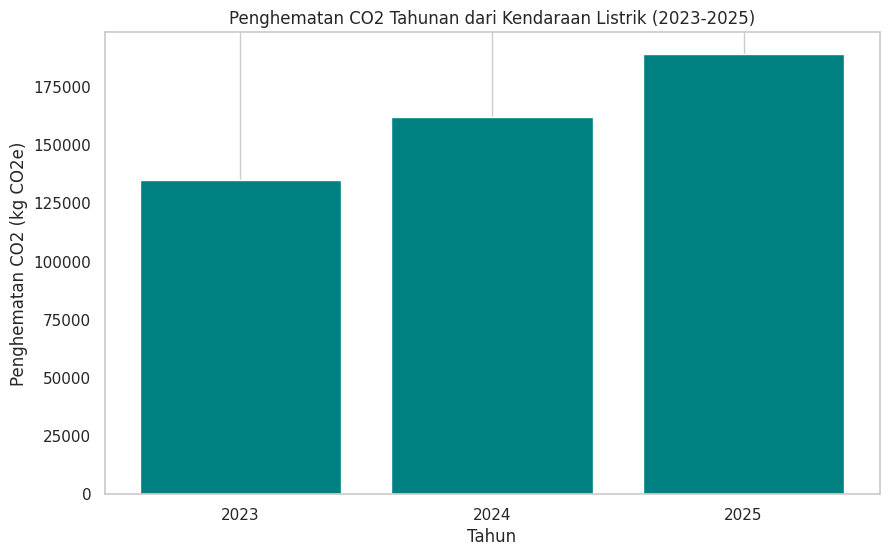

In [ ]:
# Membuat grafik batang untuk penghematan CO2 tahunan

plt.figure(figsize=(10, 6))
plt.bar(tahunan, penghematan, color='teal')
plt.title('Penghematan CO2 Tahunan dari Kendaraan Listrik (2023-2025)')
plt.xlabel('Tahun')
plt.ylabel('Penghematan CO2 (kg CO2e)')
plt.xticks(tahunan)
plt.grid(axis='y')

# Menampilkan grafik
plt.show()


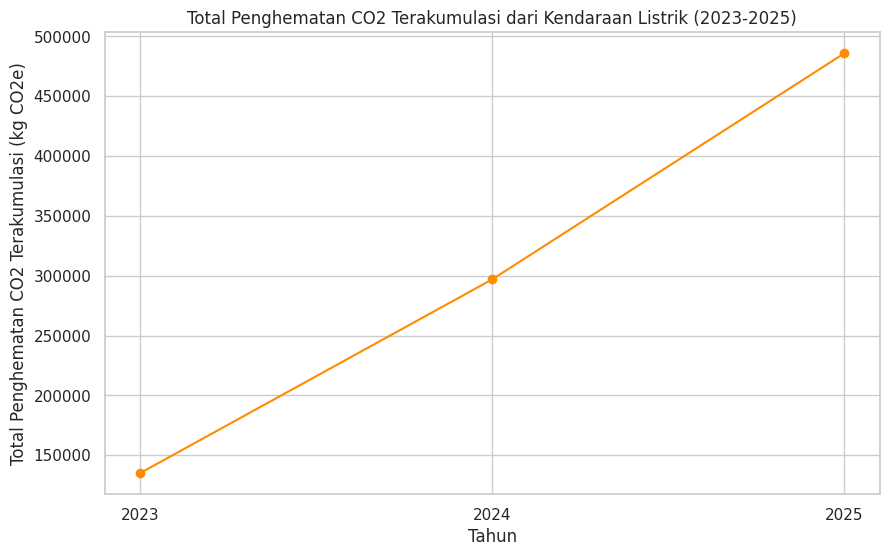

In [ ]:
# Menghitung total penghematan CO2 terakumulasi setiap tahun

total_terakumulasi = []
akumulasi = 0
for penghematan_tahunan in penghematan:
    akumulasi += penghematan_tahunan
    total_terakumulasi.append(akumulasi)

# Membuat grafik garis untuk total penghematan CO2 terakumulasi
plt.figure(figsize=(10, 6))
plt.plot(tahunan, total_terakumulasi, marker='o', color='darkorange')
plt.title('Total Penghematan CO2 Terakumulasi dari Kendaraan Listrik (2023-2025)')
plt.xlabel('Tahun')
plt.ylabel('Total Penghematan CO2 Terakumulasi (kg CO2e)')
plt.xticks(tahunan)
plt.grid(True)

# Menampilkan grafik
plt.show()


In [ ]:
# Menghitung nilai penghematan CO2 tahunan dan total penghematan CO2 terakumulasi untuk tahun 2023-2025

# Inisialisasi variabel
jumlah_kendaraan_listrik_tahun_pertama = 200
penambahan_kendaraan_per_tahun = 50
jumlah_kendaraan_listrik = jumlah_kendaraan_listrik_tahun_pertama
emisi_co2_bbm_per_tahun_per_kendaraan = 3600  # kg CO2e
emisi_co2_listrik_per_tahun_per_kendaraan = 3060  # kg CO2e

# Perhitungan
penghematan_co2_tahunan = []
total_penghematan_co2_terakumulasi = []

for tahun in range(2023, 2026):
    jumlah_kendaraan_listrik += penambahan_kendaraan_per_tahun
    total_emisi_co2_bbm_tahunan = emisi_co2_bbm_per_tahun_per_kendaraan * jumlah_kendaraan_listrik
    total_emisi_co2_listrik_tahunan = emisi_co2_listrik_per_tahun_per_kendaraan * jumlah_kendaraan_listrik
    penghematan_co2 = total_emisi_co2_bbm_tahunan - total_emisi_co2_listrik_tahunan
    penghematan_co2_tahunan.append(penghematan_co2)

    if tahun == 2023:
        total_penghematan_co2_terakumulasi.append(penghematan_co2)
    else:
        total_penghematan_co2_terakumulasi.append(total_penghematan_co2_terakumulasi[-1] + penghematan_co2)

# Membuat tabel data
tabel_data = [
    {"Tahun": 2023, "Jumlah Kendaraan Listrik": jumlah_kendaraan_listrik_tahun_pertama + penambahan_kendaraan_per_tahun, "Penghematan CO2 Tahunan (kg CO2e)": penghematan_co2_tahunan[0], "Total Penghematan CO2 Terakumulasi (kg CO2e)": total_penghematan_co2_terakumulasi[0]},
    {"Tahun": 2024, "Jumlah Kendaraan Listrik": jumlah_kendaraan_listrik_tahun_pertama + 2 * penambahan_kendaraan_per_tahun, "Penghematan CO2 Tahunan (kg CO2e)": penghematan_co2_tahunan[1], "Total Penghematan CO2 Terakumulasi (kg CO2e)": total_penghematan_co2_terakumulasi[1]},
    {"Tahun": 2025, "Jumlah Kendaraan Listrik": jumlah_kendaraan_listrik_tahun_pertama + 3 * penambahan_kendaraan_per_tahun, "Penghematan CO2 Tahunan (kg CO2e)": penghematan_co2_tahunan[2], "Total Penghematan CO2 Terakumulasi (kg CO2e)": total_penghematan_co2_terakumulasi[2]}
]

tabel_data



[{'Tahun': 2023,
  'Jumlah Kendaraan Listrik': 250,
  'Penghematan CO2 Tahunan (kg CO2e)': 135000,
  'Total Penghematan CO2 Terakumulasi (kg CO2e)': 135000},
 {'Tahun': 2024,
  'Jumlah Kendaraan Listrik': 300,
  'Penghematan CO2 Tahunan (kg CO2e)': 162000,
  'Total Penghematan CO2 Terakumulasi (kg CO2e)': 297000},
 {'Tahun': 2025,
  'Jumlah Kendaraan Listrik': 350,
  'Penghematan CO2 Tahunan (kg CO2e)': 189000,
  'Total Penghematan CO2 Terakumulasi (kg CO2e)': 486000}]

In [ ]:
import pandas as pd

# Data hasil output pengguna dalam bentuk list of dictionaries
data = [
    {'Tahun': 2023, 'Jumlah Kendaraan Listrik': 250, 'Penghematan CO2 Tahunan (kg CO2e)': 135000, 'Total Penghematan CO2 Terakumulasi (kg CO2e)': 135000},
    {'Tahun': 2024, 'Jumlah Kendaraan Listrik': 300, 'Penghematan CO2 Tahunan (kg CO2e)': 162000, 'Total Penghematan CO2 Terakumulasi (kg CO2e)': 297000},
    {'Tahun': 2025, 'Jumlah Kendaraan Listrik': 350, 'Penghematan CO2 Tahunan (kg CO2e)': 189000, 'Total Penghematan CO2 Terakumulasi (kg CO2e)': 486000}
]

# Mengubah data ke dalam DataFrame
df = pd.DataFrame(data)

# Menampilkan DataFrame
df


,Tahun,Jumlah Kendaraan Listrik,Penghematan CO2 Tahunan (kg CO2e),Total Penghematan CO2 Terakumulasi (kg CO2e)
0,2023,250,135000,135000
1,2024,300,162000,297000
2,2025,350,189000,486000
